<h1><b><font color='80B6A1'>Service Now Stock Analysis</b></h1>


<h3><b>Team Members</h3></b>


1.   Rhea Bajpai
2.   Aniket Mirajkar
3.   Mandar Deshmukh
4.   Rituja Lolam
5.   Abhishek Badhe
6.   Simran Nagpurkar

<h3><b>Abstract



In [1]:
# installing packages
!pip install getFamaFrenchFactors
!pip install fredapi
!pip install pandas_datareader

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import minimize
from pandas_datareader import DataReader
from pandas_datareader import data as pdr
import seaborn as sns
from datetime import datetime
import yfinance as yf
from scipy.stats import norm
from functools import reduce
import getFamaFrenchFactors as gff
from fredapi import Fred

### Getting ServiceNow stock data

In [3]:
yf.pdr_override()
# Define the start and end dates
start_date = datetime(2020,1,1)
end_date = datetime(2023,11,30)

now_df = pd.DataFrame()
# Get the stock data
df = pdr.get_data_yahoo('NOW', start_date, end_date)
now_df = pd.concat([now_df, df])
now_df.index = pd.to_datetime(now_df.index)
now_df.index = now_df.index.date
now_df.index.name = 'Date'

[*********************100%%**********************]  1 of 1 completed


In [4]:
summary_stats = now_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))
summary_stats

Open       High        Low      Close  Adj Close         Volume
count  985.00000  985.00000  985.00000  985.00000  985.00000      985.00000
mean   492.37224  500.29516  484.30503  492.45942  492.45942  1575455.63452
std     97.02578   97.15346   96.66766   96.89393   96.89393   800293.11039
min    251.00999  260.39001  238.92999  249.57001  249.57001   401400.00000
25%    430.00000  437.76001  422.60999  430.12000  430.12000  1038300.00000
50%    495.16000  502.63000  484.89999  494.85001  494.85001  1390500.00000
75%    559.71997  566.75000  553.00000  560.40002  560.40002  1863900.00000
max    702.00000  707.59998  689.15002  701.72998  701.72998  8692900.00000

#### Below code represent a grid of subplots, where each subplot represents the adjusted close prices of a particular stock for the year 2023.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


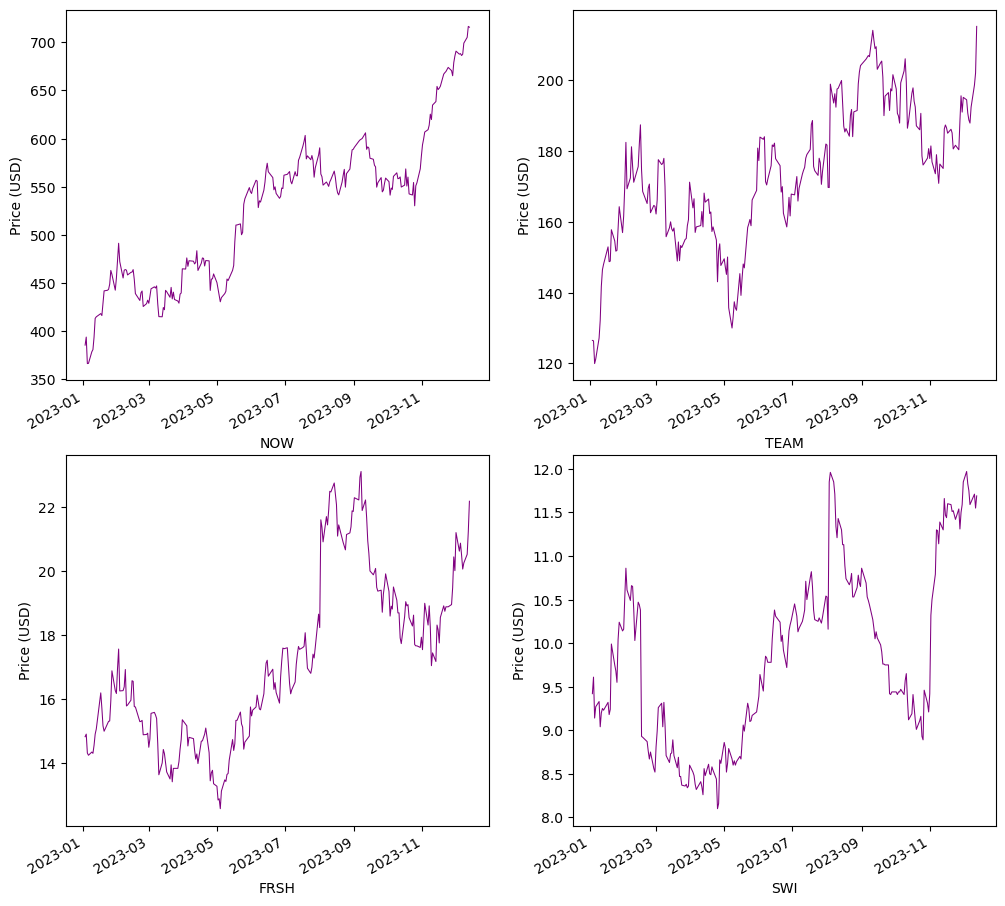

In [5]:

# Set the figure size for the plots
plt.figure(figsize=(12, 12))
comp = ['NOW','TEAM','FRSH','SWI']

# Loop through each company ticker symbol in the list
for i, company in enumerate(comp, 1):
    # Create subplots within the figure
    plt.subplot(2, 2, i)

    # Download stock data for the current company within a specified date range
    STOCK = yf.download(company, start='2023-01-01', end='2023-12-31')

    # Plot the 'Adjusted Close' prices for the stock
    STOCK['Adj Close'].plot(linewidth=0.75, color='purple')

    # Set labels for the y-axis and x-axis
    plt.ylabel("Price (USD)")
    plt.xlabel(company)


# Display the plots
plt.show()


### STOCK PRICE VISUALIZATION

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


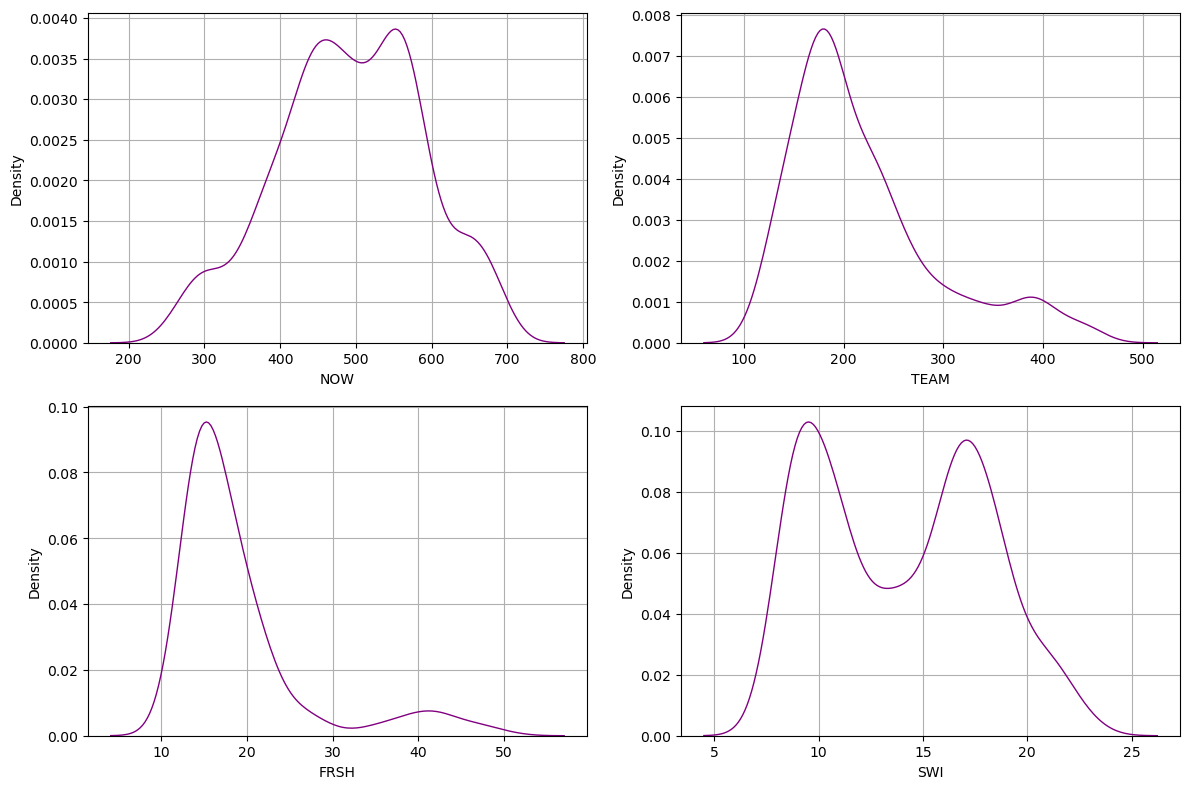

In [6]:
# Define a function for plotting stock prices
def plot_stock_prices(stock_data, company_name):
    plt.grid(1)
    sns.kdeplot(data=stock_data, color='purple', linewidth=1)
    plt.xlabel(company_name)

# Create subplots for each company in the list 'comp'
plt.rcParams['figure.figsize'] = (12, 8)
for i, company in enumerate(comp, 1):
    plt.subplot(2, 2, i)
    STOCK = yf.download(company, start=start_date, end=end_date)
    X = STOCK['Adj Close'].values
    plot_stock_prices(X, company)
plt.tight_layout()
plt.show()


### Histograms

### Each Histogram shows the frequency distribution of 'Adj Close' prices for one of the four companies: NOW, TEAM, FRSH, and SWI

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


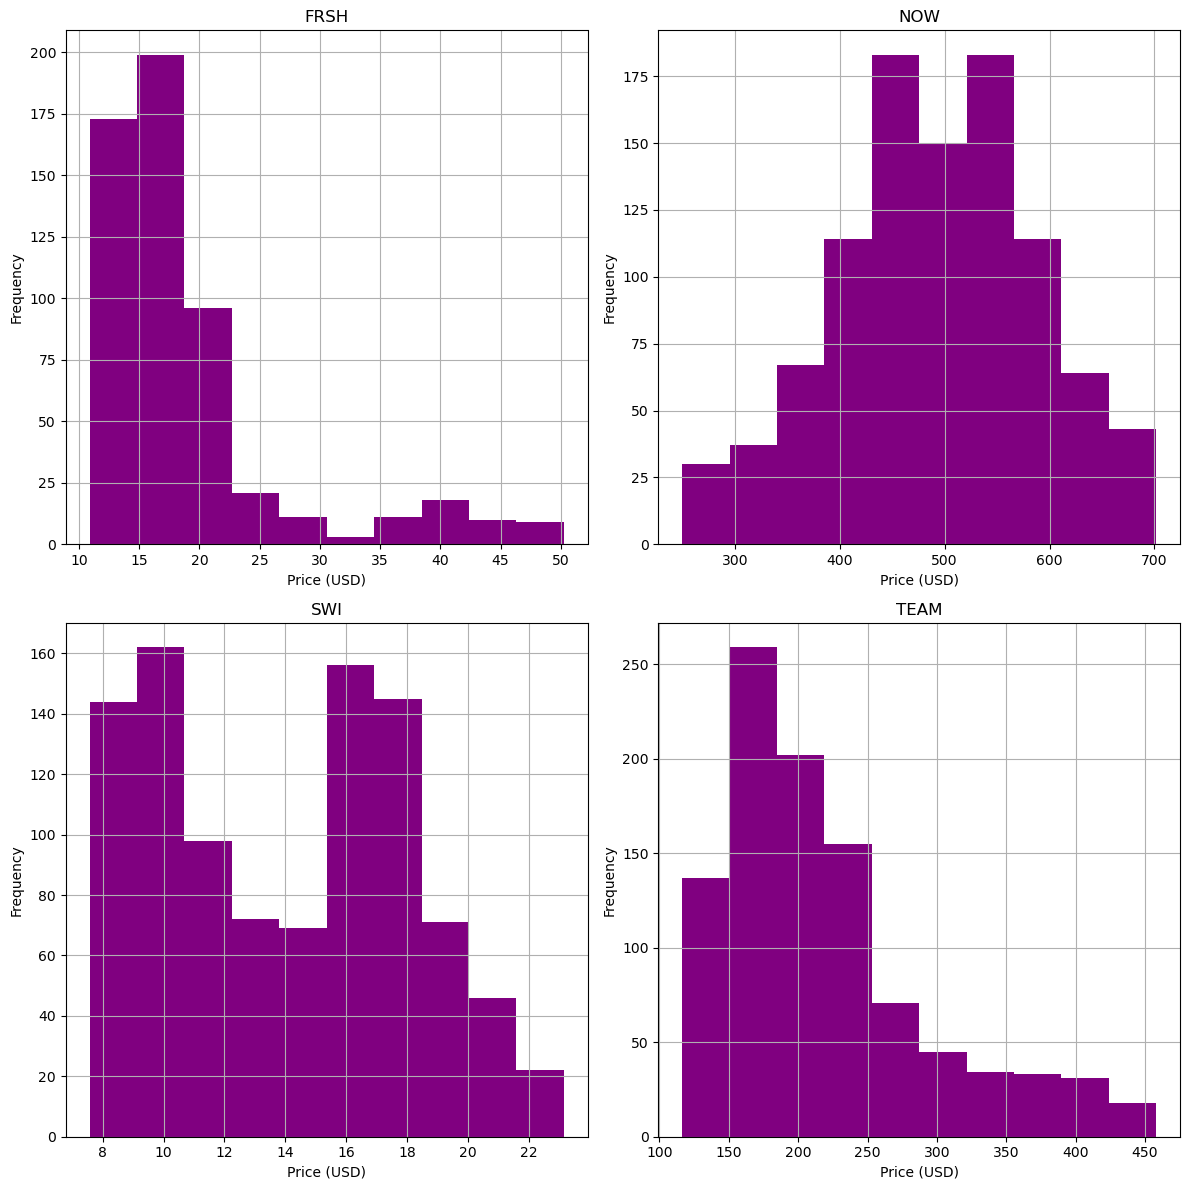

In [7]:


# Override the pandas_datareader's Yahoo Finance API with yfinance
yf.pdr_override()

# Define the start and end dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 11, 30)

comp = ['NOW', 'TEAM', 'FRSH', 'SWI']
now_df = pd.DataFrame()

# Loop through each company ticker symbol in the list 'comp'
for company in comp:
    # Get the stock data
    df = pdr.get_data_yahoo(company, start=start_date, end=end_date)
    df['Company'] = company
    now_df = pd.concat([now_df, df])

# Convert the index to datetime format and extract only the date part
now_df.index = pd.to_datetime(now_df.index)
now_df.index = now_df.index.date
now_df.index.name = 'Date'

# group the dataframe and calculate the sum
grouped = now_df.groupby("Company")

# Create separate histograms for each company
plt.figure(figsize=(12, 12))
for i, (company, data) in enumerate(grouped):
    plt.subplot(2, 2, i + 1)
    data['Adj Close'].hist(color='purple')
    plt.title(company)
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Correlation Heatmap

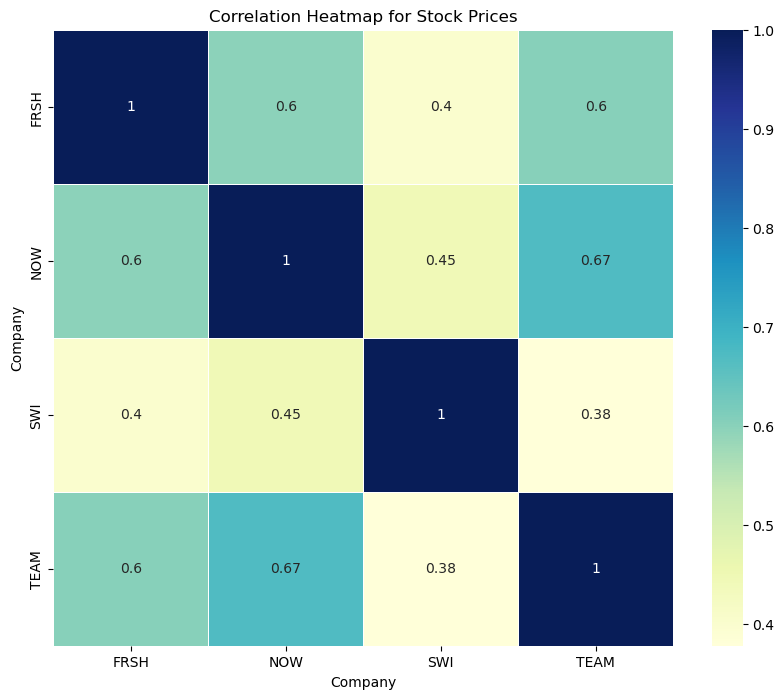

In [8]:
# Calculate the daily percentage change for the adjusted close prices
daily_returns = now_df.pivot(columns='Company', values='Adj Close').pct_change()

# Calculate the correlation matrix
correlation_matrix = daily_returns.corr()

# Plot the correlation heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap for Stock Prices')
plt.show()


### Boxplot for Stock Price Distribution

In [9]:
# # Create boxplots to visualize the distribution of stock prices
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=returns, palette='Set3')
# plt.title('Boxplot of Daily Returns for Stocks')
# plt.xticks(rotation=45)
# plt.show()


In [10]:
stocks = ['NOW', 'TEAM', 'SWI', 'FRSH']
# Download adjusted closing prices data for the specified stocks within the given date range
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Calculate moving averages for each stock
for stock in stocks:
    for days in [10, 20, 50]:
        # Calculate the moving average and create new columns in the DataFrame for each moving average
        data[f'{days} day MA - {stock}'] = data[stock].rolling(window=days).mean()

[*********************100%%**********************]  4 of 4 completed


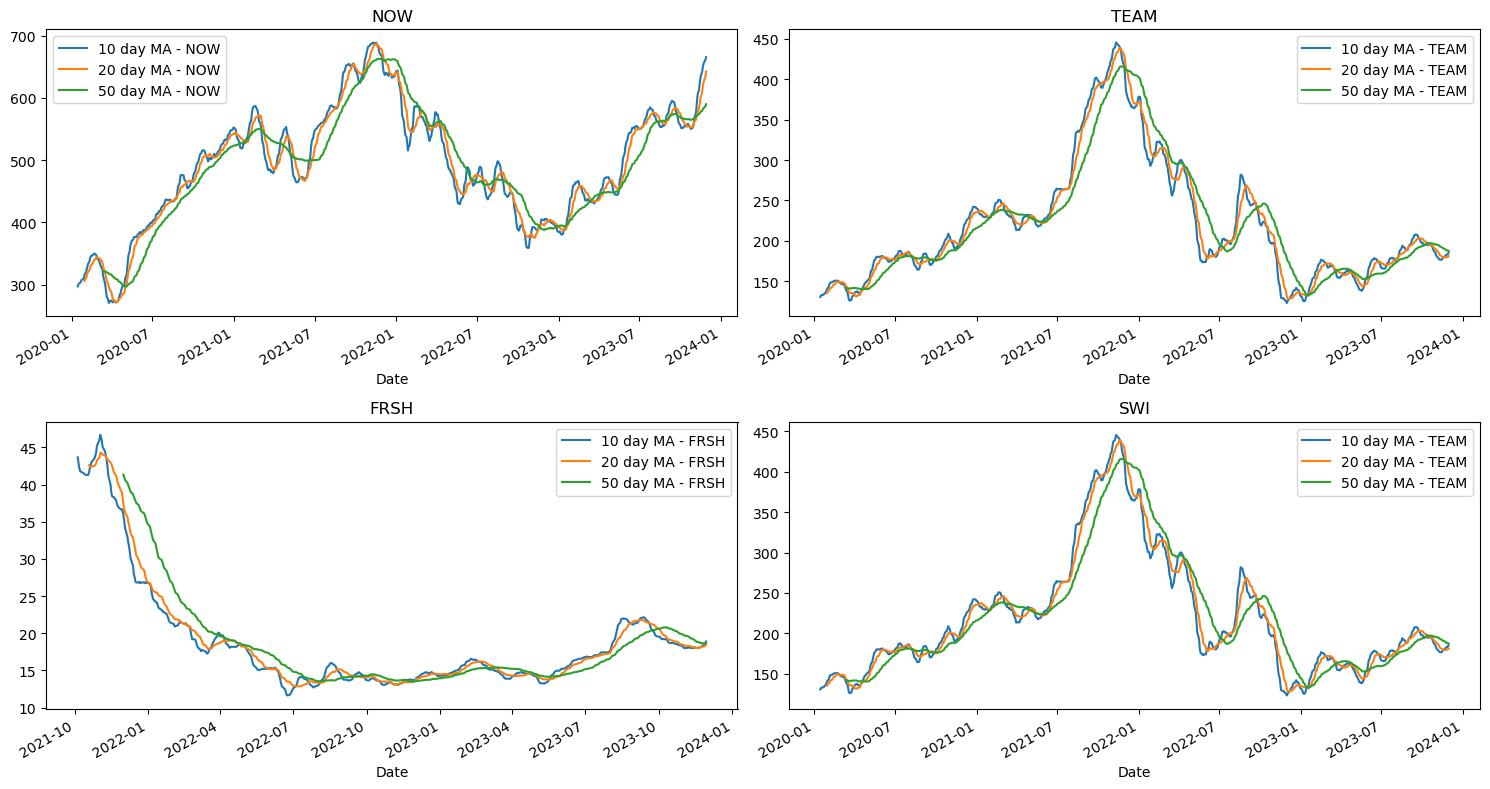

In [11]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

NOW = data[['10 day MA - NOW','20 day MA - NOW','50 day MA - NOW']]
NOW.plot(ax=axes[0,0],)
axes[0,0].set_title('NOW')

TEAM = data[['10 day MA - TEAM','20 day MA - TEAM','50 day MA - TEAM']]
TEAM.plot(ax=axes[0,1])
axes[0,1].set_title('TEAM')
fig.tight_layout()

FRSH = data[['10 day MA - FRSH','20 day MA - FRSH','50 day MA - FRSH']]
FRSH.plot(ax=axes[1,0])
axes[1,0].set_title('FRSH')
fig.tight_layout()

SWI = data[['10 day MA - SWI','20 day MA - SWI','50 day MA - SWI']]
TEAM.plot(ax=axes[1,1])
axes[1,1].set_title('SWI')

fig.tight_layout()

In [12]:
# Define start and end dates using datetime
start_date = datetime(2023, 1, 1)  # Start date: January 1, 2023
end_date = datetime(2023, 9, 30)   # End date: September 30, 2023

# Download stock data for the ticker 'NOW' within the specified date range
STOCK = yf.download('NOW', start=start_date, end=end_date)

# Extract 'Adj Close' prices and store them in variable X
X = STOCK['Adj Close'].values

[*********************100%%**********************]  1 of 1 completed


### Plotting Daily Return Percentage


[*********************100%%**********************]  4 of 4 completed


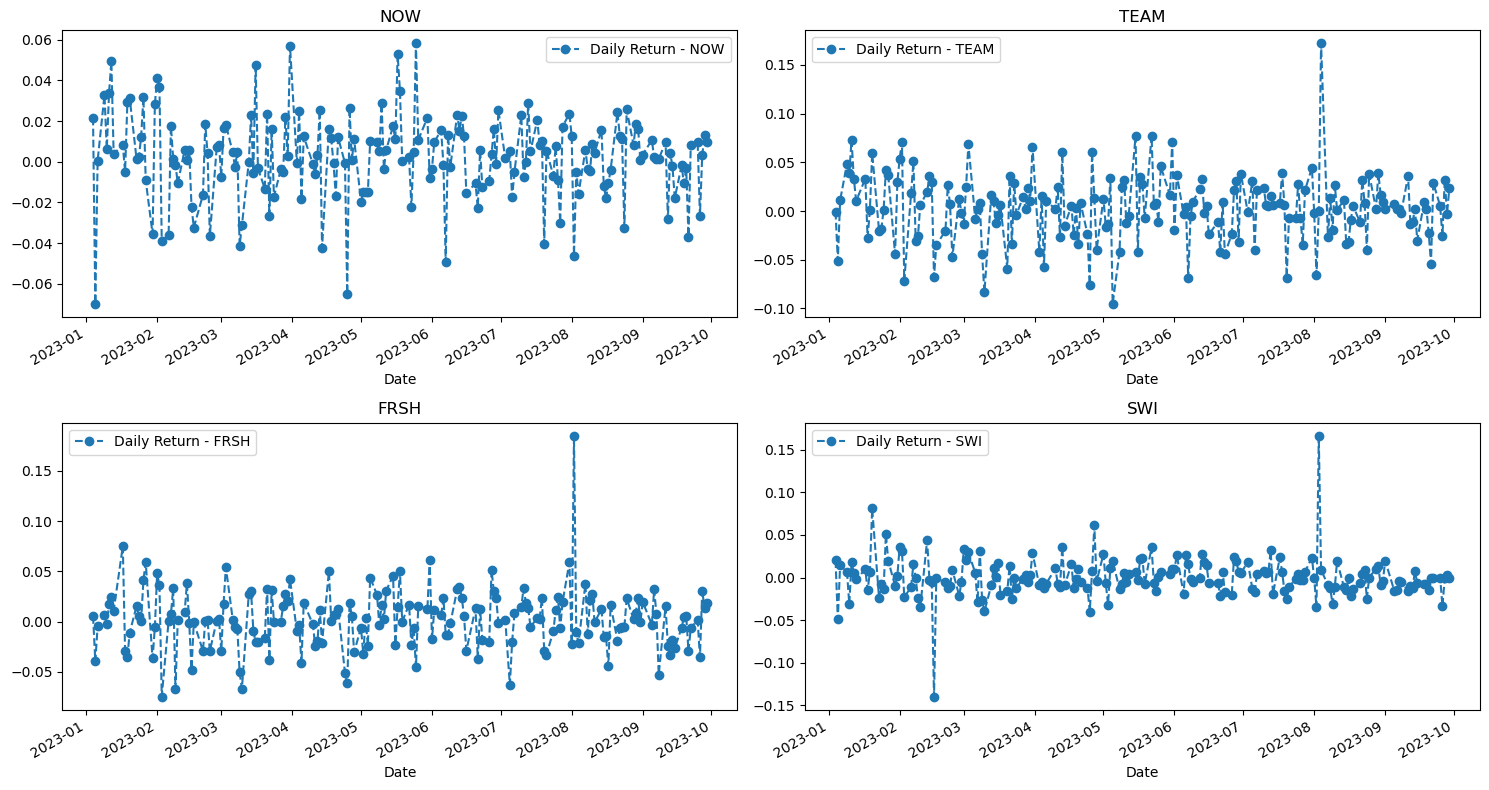

In [13]:
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

for stock in stocks:
        data[f'Daily Return - {stock}'] = data[stock].pct_change()

# To plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

NOW = data['Daily Return - NOW'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('NOW')

TEAM = data['Daily Return - TEAM'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('TEAM')

FRSH = data['Daily Return - FRSH'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('FRSH')

SWI = data['Daily Return - SWI'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('SWI')

fig.tight_layout()

### Plotting Adjusted Close Prices

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


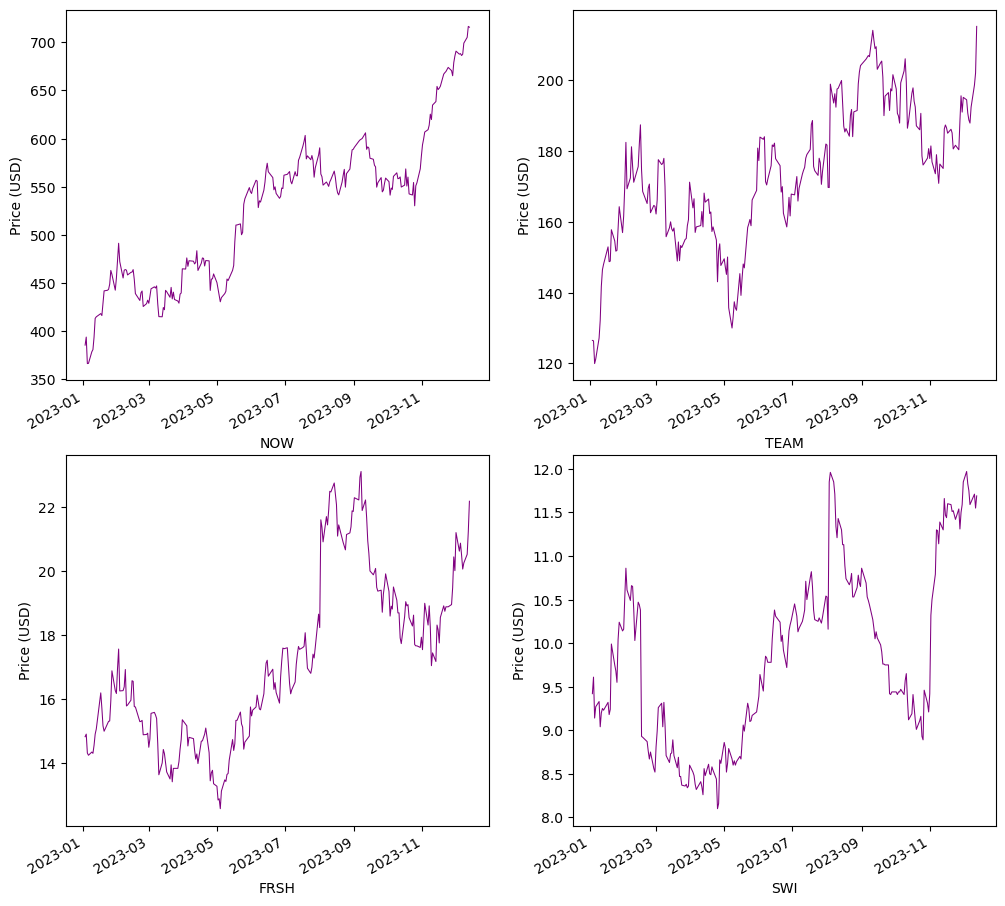

In [14]:
plt.figure(figsize=(12, 12))

# Loop through each company ticker symbol in the list 'comp'
for i, company in enumerate(comp, 1):
    plt.subplot(2, 2, i)

    # Download stock data for the current company within a specified date range
    STOCK = yf.download(company, start='2023-01-01', end='2023-12-31')

    # Plot the 'Adjusted Close' prices for the stock
    STOCK['Adj Close'].plot(linewidth=0.75, color='purple')

    # Set labels for the y-axis and x-axis
    plt.ylabel("Price (USD)")
    plt.xlabel(company)

# Display the plots
plt.show()


### Kernel Density Estimate (KDE) plot

[*********************100%%**********************]  4 of 4 completed
            Mean  Standard Deviation  Skewness  Kurtosis
FRSH   19.128358            7.918492  2.150925  4.091288
NOW   356.130903          177.216484  0.024738 -1.331573
SWI    14.792311            3.910576 -0.261489 -1.198644
TEAM  157.040868           94.249782  0.776575  0.379561


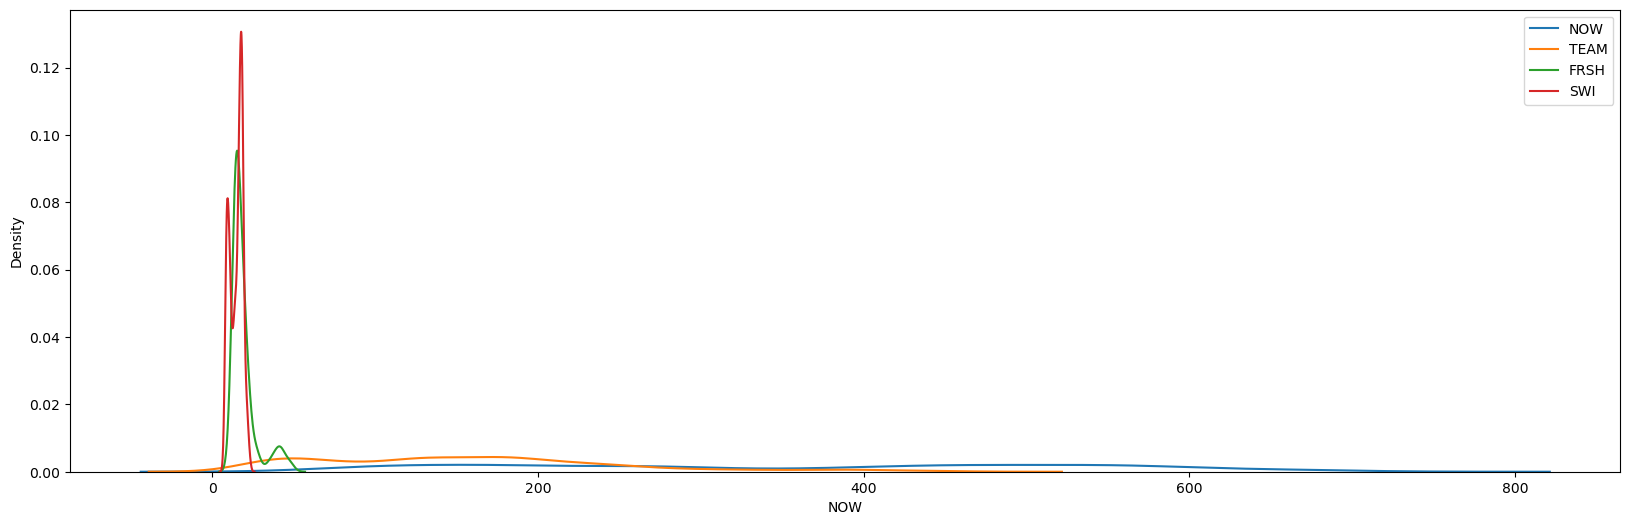

In [15]:
#KDE Plot
# Define the tickers of the stocks to analyze
tickers = ['NOW','TEAM','FRSH','SWI']

# Define the start and end dates
start_date = '2017-01-01'
end_date = '2023-11-30'

# Compute the summary statistics for each stock
stock_prices =  pdr.get_data_yahoo(tickers, start=start_date, end=end_date)['Adj Close']
summary_stats = pd.concat([stock_prices .mean(), stock_prices .std(), stock_prices .skew(), stock_prices .kurtosis()], axis=1)
summary_stats.columns = ['Mean', 'Standard Deviation', 'Skewness', 'Kurtosis']
print(summary_stats)

# Plot the kernel density for each stock
plt.rcParams['figure.figsize'] = (20,6)
sns.kdeplot(stock_prices ['NOW'], label='NOW')
sns.kdeplot(stock_prices ['TEAM'], label='TEAM')
sns.kdeplot(stock_prices ['FRSH'], label='FRSH')
sns.kdeplot(stock_prices ['SWI'], label='SWI')
plt.legend()

# 2. Please use the features/factors you take and discovered (e.g. FRED, Fama-French website, ADS, AR, CAPM, momentum factors, volume, price/return lags, etc.) to construct a feature database. The target variable Y can be either price or return. Frequency could be either daily or monthly.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
yf.pdr_override()

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Get the historical stock data for ServiceNow
df = yf.download('NOW')
df.reset_index(inplace=True)

# filter the data for the required time range
start_date = '2015-01-01'
end_date = '2023-11-30'
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df.head(10)

[*********************100%%**********************]  1 of 1 completed


Date       Open       High        Low      Close  Adj Close   Volume
630 2015-01-02  67.809998  68.489998  66.269997  67.379997  67.379997   815800
631 2015-01-05  66.570000  68.370003  66.430000  67.150002  67.150002   800500
632 2015-01-06  67.180000  67.870003  65.169998  66.330002  66.330002   855900
633 2015-01-07  66.910004  67.470001  66.000000  67.089996  67.089996   623000
634 2015-01-08  67.870003  69.080002  67.440002  68.889999  68.889999   637100
635 2015-01-09  69.279999  69.279999  66.230003  67.110001  67.110001  1037100
636 2015-01-12  67.120003  68.440002  66.500000  68.190002  68.190002   799300
637 2015-01-13  67.800003  69.440002  66.459999  67.269997  67.269997   628400
638 2015-01-14  66.190002  66.599998  65.419998  66.339996  66.339996   755600
639 2015-01-15  66.690002  66.690002  63.439999  63.630001  63.630001  1017300

In [20]:
from fredapi import Fred
import pandas as pd
fred = Fred(api_key ='f2981c82f1c4eeeecb70f28cc6b4f367')
unrate = fred.get_series('UNRATE', observation_start='2015-01-01', observation_end='2023-11-30' )
df1 = pd.DataFrame({'Date': unrate.index, 'Unemployment Rate': unrate.values})

# Set the date as the index
df1.set_index('Date', inplace=True)

# Use the resample method to convert the data from monthly to daily
df1 = df1.resample('D').ffill()
df2= pd.merge(df, df1, on="Date")
df2

Date        Open        High         Low       Close   Adj Close  \
0    2015-01-02   67.809998   68.489998   66.269997   67.379997   67.379997   
1    2015-01-05   66.570000   68.370003   66.430000   67.150002   67.150002   
2    2015-01-06   67.180000   67.870003   65.169998   66.330002   66.330002   
3    2015-01-07   66.910004   67.470001   66.000000   67.089996   67.089996   
4    2015-01-08   67.870003   69.080002   67.440002   68.889999   68.889999   
...         ...         ...         ...         ...         ...         ...   
2219 2023-10-26  560.000000  579.000000  548.859985  550.950012  550.950012   
2220 2023-10-27  556.460022  564.000000  548.440002  554.010010  554.010010   
2221 2023-10-30  559.599976  572.169983  558.090027  568.539978  568.539978   
2222 2023-10-31  570.869995  584.840027  564.900024  581.849976  581.849976   
2223 2023-11-01  581.000000  595.090027  580.440002  593.479980  593.479980   

       Volume  Unemployment Rate  
0      815800                5.7  
1      800500                5.7  
2      855900                5.7  
3      623000                5.7  
4      637100                5.7  
...       ...                ...  
2219  3548000                3.9  
2220  1755800                3.9  
2221  1448200                3.9  
2222  1615500                3.9  
2223  1769400                3.7  

[2224 rows x 8 columns]

In [21]:
cpia = fred.get_series('CPIAUCSL', observation_start='2015-01-01', observation_end='2023-11-30' )
df3 = pd.DataFrame({'Date': cpia.index, 'Consumer Index': cpia.values})

# Set the date as the index
df3.set_index('Date', inplace=True)

# Use the resample method to convert the data from monthly to daily
df3 = df3.resample('D').ffill()

df4= pd.merge(df2, df3, on="Date")
df4

Date        Open        High         Low       Close   Adj Close  \
0    2015-01-02   67.809998   68.489998   66.269997   67.379997   67.379997   
1    2015-01-05   66.570000   68.370003   66.430000   67.150002   67.150002   
2    2015-01-06   67.180000   67.870003   65.169998   66.330002   66.330002   
3    2015-01-07   66.910004   67.470001   66.000000   67.089996   67.089996   
4    2015-01-08   67.870003   69.080002   67.440002   68.889999   68.889999   
...         ...         ...         ...         ...         ...         ...   
2219 2023-10-26  560.000000  579.000000  548.859985  550.950012  550.950012   
2220 2023-10-27  556.460022  564.000000  548.440002  554.010010  554.010010   
2221 2023-10-30  559.599976  572.169983  558.090027  568.539978  568.539978   
2222 2023-10-31  570.869995  584.840027  564.900024  581.849976  581.849976   
2223 2023-11-01  581.000000  595.090027  580.440002  593.479980  593.479980   

       Volume  Unemployment Rate  Consumer Index  
0      815800                5.7         234.747  
1      800500                5.7         234.747  
2      855900                5.7         234.747  
3      623000                5.7         234.747  
4      637100                5.7         234.747  
...       ...                ...             ...  
2219  3548000                3.9         307.619  
2220  1755800                3.9         307.619  
2221  1448200                3.9         307.619  
2222  1615500                3.9         307.619  
2223  1769400                3.7         307.917  

[2224 rows x 9 columns]

In [22]:
sp = fred.get_series('SP500', observation_start='2015-01-01', observation_end='2023-11-30' )
df_sp = pd.DataFrame({'Date': sp.index, 'SP500': sp.values})

# Set the date as the index
df_sp.set_index('Date', inplace=True)

# Use the resample method to convert the data from monthly to daily
df_sp = df_sp.resample('D').ffill()

df_sp500= pd.merge(df4, df_sp, on="Date")
df_sp500.rename(columns={'Date': 'date'}, inplace=True)

In [23]:
# Get the Fama French 5 factor model (monthly data)
data_ff5 = pd.read_csv('/Users/mandardeshmukh/Desktop/FF_Research_Data_5_Factors_daily.csv')
data_ff5['date'] = data_ff5['date'].astype(str).str[0:4]+'-'\
                    +data_ff5['date'].astype(str).str[4:6]+'-'\
                    +data_ff5['date'].astype(str).str[6:8]

data_ff5['date'] = pd.to_datetime(data_ff5['date'])

# data_ff5['date'] = data_ff5['date'].dt.date
data_ff5.set_index('date',inplace = True)

df5= pd.merge(df_sp500, data_ff5, on="date")
df5

date        Open        High         Low       Close   Adj Close  \
0    2015-01-02   67.809998   68.489998   66.269997   67.379997   67.379997   
1    2015-01-05   66.570000   68.370003   66.430000   67.150002   67.150002   
2    2015-01-06   67.180000   67.870003   65.169998   66.330002   66.330002   
3    2015-01-07   66.910004   67.470001   66.000000   67.089996   67.089996   
4    2015-01-08   67.870003   69.080002   67.440002   68.889999   68.889999   
...         ...         ...         ...         ...         ...         ...   
2218 2023-10-25  549.369995  552.099976  527.239990  530.169983  530.169983   
2219 2023-10-26  560.000000  579.000000  548.859985  550.950012  550.950012   
2220 2023-10-27  556.460022  564.000000  548.440002  554.010010  554.010010   
2221 2023-10-30  559.599976  572.169983  558.090027  568.539978  568.539978   
2222 2023-10-31  570.869995  584.840027  564.900024  581.849976  581.849976   

       Volume  Unemployment Rate  Consumer Index    SP500  Mkt-RF   SMB   HML  \
0      815800                5.7         234.747  2058.20   -0.12 -0.57  0.08   
1      800500                5.7         234.747  2020.58   -1.84  0.25 -0.68   
2      855900                5.7         234.747  2002.61   -1.04 -0.78 -0.31   
3      623000                5.7         234.747  2025.90    1.19  0.17 -0.66   
4      637100                5.7         234.747  2062.14    1.81 -0.10 -0.28   
...       ...                ...             ...      ...     ...   ...   ...   
2218  2008900                3.9         307.619  4186.77   -1.58 -0.02  0.84   
2219  3548000                3.9         307.619  4137.23   -1.15  1.19  1.66   
2220  1755800                3.9         307.619  4117.37   -0.53 -0.58 -0.57   
2221  1448200                3.9         307.619  4166.82    1.15 -0.34  0.28   
2222  1615500                3.9         307.619  4193.80    0.63  0.06 -0.08   

       RMW   CMA     RF  
0    -0.25  0.12  0.000  
1     0.16 -0.08  0.000  
2     0.53  0.02  0.000  
3     0.25 -0.14  0.000  
4     0.11 -0.16  0.000  
...    ...   ...    ...  
2218  1.50  0.20  0.021  
2219 -0.76  0.48  0.021  
2220  0.42 -0.96  0.021  
2221 -0.14  0.17  0.021  
2222 -0.83  0.06  0.021  

[2223 rows x 16 columns]

In [24]:
# Load ADS Index data
df_ads = pd.read_excel('/Users/mandardeshmukh/Desktop/ADS_Index_Most_Current_Vintage.xlsx')
df_ads = df_ads.rename(columns={df_ads.columns[0]: 'date'})
df_ads['date'] = df_ads['date'].str.replace(':','-')
df_ads['date'] = pd.to_datetime(df_ads['date'])

df_ads.set_index('date',inplace = True)

df_merge = pd.merge(df5, df_ads, on="date")
df_merge

df_merge['Yest_Close']  = df_merge['Adj Close'].shift(1)



df_merge = df_merge[df_merge['Yest_Close'].notna()]
df_merge = df_merge[df_merge['Mkt-RF'].notna()]
df_merge = df_merge[df_merge['SMB'].notna()]
df_merge = df_merge[df_merge['HML'].notna()]
df_merge = df_merge[df_merge['RF'].notna()]

df_merge


date        Open        High         Low       Close   Adj Close  \
1    2015-01-05   66.570000   68.370003   66.430000   67.150002   67.150002   
2    2015-01-06   67.180000   67.870003   65.169998   66.330002   66.330002   
3    2015-01-07   66.910004   67.470001   66.000000   67.089996   67.089996   
4    2015-01-08   67.870003   69.080002   67.440002   68.889999   68.889999   
5    2015-01-09   69.279999   69.279999   66.230003   67.110001   67.110001   
...         ...         ...         ...         ...         ...         ...   
2218 2023-10-25  549.369995  552.099976  527.239990  530.169983  530.169983   
2219 2023-10-26  560.000000  579.000000  548.859985  550.950012  550.950012   
2220 2023-10-27  556.460022  564.000000  548.440002  554.010010  554.010010   
2221 2023-10-30  559.599976  572.169983  558.090027  568.539978  568.539978   
2222 2023-10-31  570.869995  584.840027  564.900024  581.849976  581.849976   

       Volume  Unemployment Rate  Consumer Index    SP500  Mkt-RF   SMB   HML  \
1      800500                5.7         234.747  2020.58   -1.84  0.25 -0.68   
2      855900                5.7         234.747  2002.61   -1.04 -0.78 -0.31   
3      623000                5.7         234.747  2025.90    1.19  0.17 -0.66   
4      637100                5.7         234.747  2062.14    1.81 -0.10 -0.28   
5     1037100                5.7         234.747  2044.81   -0.85 -0.03 -0.47   
...       ...                ...             ...      ...     ...   ...   ...   
2218  2008900                3.9         307.619  4186.77   -1.58 -0.02  0.84   
2219  3548000                3.9         307.619  4137.23   -1.15  1.19  1.66   
2220  1755800                3.9         307.619  4117.37   -0.53 -0.58 -0.57   
2221  1448200                3.9         307.619  4166.82    1.15 -0.34  0.28   
2222  1615500                3.9         307.619  4193.80    0.63  0.06 -0.08   

       RMW   CMA     RF  ADS_Index  Yest_Close  
1     0.16 -0.08  0.000  -0.235984   67.379997  
2     0.53  0.02  0.000  -0.248888   67.150002  
3     0.25 -0.14  0.000  -0.260993   66.330002  
4     0.11 -0.16  0.000  -0.272305   67.089996  
5    -0.12 -0.16  0.000  -0.282826   68.889999  
...    ...   ...    ...        ...         ...  
2218  1.50  0.20  0.021  -0.529790  554.390015  
2219 -0.76  0.48  0.021  -0.521524  530.169983  
2220  0.42 -0.96  0.021  -0.511475  550.950012  
2221 -0.14  0.17  0.021  -0.471021  554.010010  
2222 -0.83  0.06  0.021  -0.454659  568.539978  

[2222 rows x 18 columns]

In [25]:
df_merge.to_csv('/Users/mandardeshmukh/Desktop/feature_database.csv')

# 3. Virtualize the feature importance and feature selection process using regression based approach (Ridge regression, LASSO, Elastic Net or LARS) vs decision tree based approach (random forest, XGBoost).

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
import statsmodels.api as sm
import scipy.stats as ss
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [27]:
df_data = df_merge[['date','Unemployment Rate','SP500','Consumer Index','Mkt-RF','SMB','HML','RF','ADS_Index','Adj Close']]

In [28]:
# Convert 'Date' to DateTimeIndex
df_data['date'] = pd.to_datetime(df_data['date'])
df_data = df_data.set_index('date')

In [29]:
# Define the training period
train_start_date = '2015-01-01'
train_end_date = '2021-12-31'

# Define the testing period
test_start_date = '2022-01-01'
test_end_date = '2023-11-30'

# Split the data into training and testing sets
train = df_data.loc[train_start_date:train_end_date]
train = train.reset_index()
test = df_data.loc[test_start_date:test_end_date]
test = test.reset_index()
X_train = train.drop(columns = ['date','Adj Close']).fillna(method='bfill')
y_train = np.diff(np.log(train['Adj Close'].values))
y_train = np.append(y_train[0], y_train)
X_test = test.drop(columns = ['date','Adj Close']).fillna(method='bfill')
y_test = np.diff(np.log(test['Adj Close'].values))
y_test = np.append(y_test[0], y_test)

# Ridge Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
import statsmodels.api as sm
import scipy.stats as ss
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [31]:
pipeline = Pipeline([('scaler',StandardScaler()),('model',Ridge())])
search = GridSearchCV(pipeline,{'model__alpha':np.arange(0.01,1,0.1)},cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 2/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 3/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 4/5] END ................model__alpha=0.01;, score=-0.001 total time=   0.0s
[CV 5/5] END ................model__alpha=0.01;, score=-0.000 total time=   0.0s
[CV 1/5] END ................model__alpha=0.11;, score=-0.000 total time=   0.0s
[CV 2/5] END ................model__alpha=0.11;, score=-0.000 total time=   0.0s
[CV 3/5] END ................model__alpha=0.11;, score=-0.000 total time=   0.0s
[CV 4/5] END ................model__alpha=0.11;, score=-0.001 total time=   0.0s
[CV 5/5] END ................model__alpha=0.11;, score=-0.000 total time=   0.0s
[CV 1/5] END .model__alpha=0.21000000000000002;, score=-0.000 total time=   0.0s
[CV 2/5] END .model__alpha=0.21000000000000002;,

{'model__alpha': 0.91}

In [32]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

array([0.00033895, 0.00330062, 0.00329063, 0.01501358, 0.00091619,
       0.00904291, 0.00096369, 0.00025099])

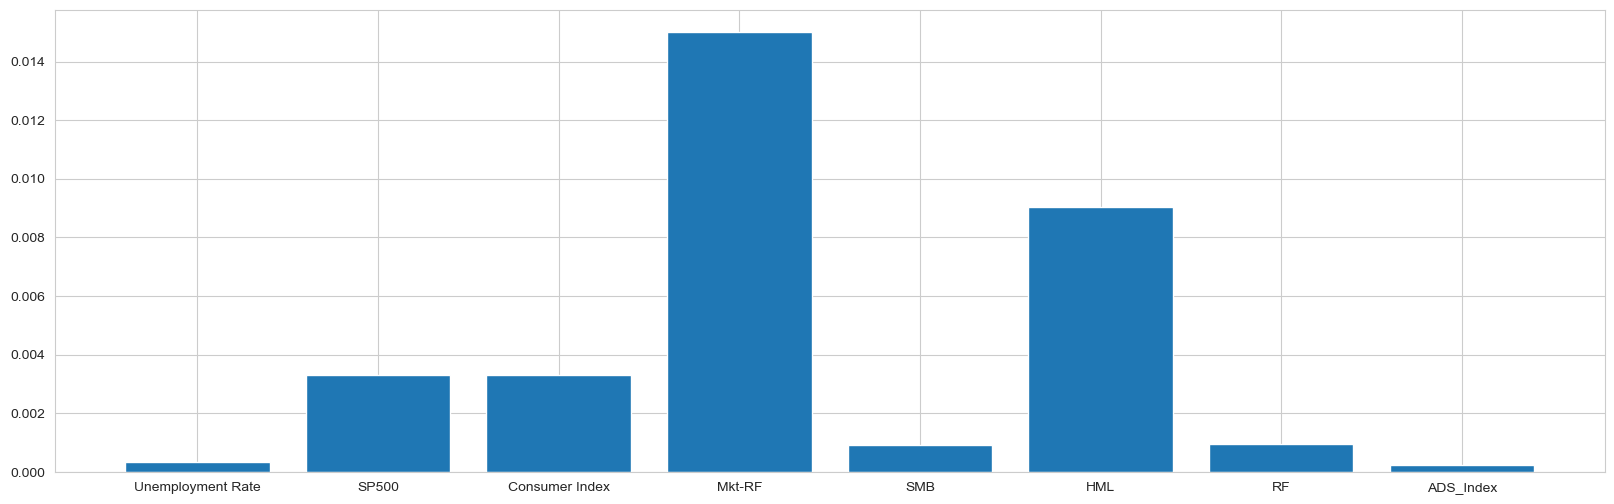

In [33]:
plt.bar(['Unemployment Rate','SP500','Consumer Index','Mkt-RF','SMB','HML','RF','ADS_Index'], importance)
plt.show()

# Lasso Regression

In [34]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.0001,0.01,0.0001)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train,y_train)

search.best_params_

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ..............model__alpha=0.0001;, score=-0.000 total time=   0.0s
[CV 2/5] END ..............model__alpha=0.0001;, score=-0.000 total time=   0.0s
[CV 3/5] END ..............model__alpha=0.0001;, score=-0.000 total time=   0.0s
[CV 4/5] END ..............model__alpha=0.0001;, score=-0.000 total time=   0.0s
[CV 5/5] END ..............model__alpha=0.0001;, score=-0.000 total time=   0.0s
[CV 1/5] END ..............model__alpha=0.0002;, score=-0.000 total time=   0.0s
[CV 2/5] END ..............model__alpha=0.0002;, score=-0.000 total time=   0.0s
[CV 3/5] END ..............model__alpha=0.0002;, score=-0.000 total time=   0.0s
[CV 4/5] END ..............model__alpha=0.0002;, score=-0.000 total time=   0.0s
[CV 5/5] END ..............model__alpha=0.0002;, score=-0.000 total time=   0.0s
[CV 1/5] END model__alpha=0.00030000000000000003;, score=-0.000 total time=   0.0s
[CV 2/5] END model__alpha=0.00030000000000000

{'model__alpha': 0.0005}

In [35]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.        , 0.01464418, 0.00021672,
       0.00825141, 0.        , 0.        ])

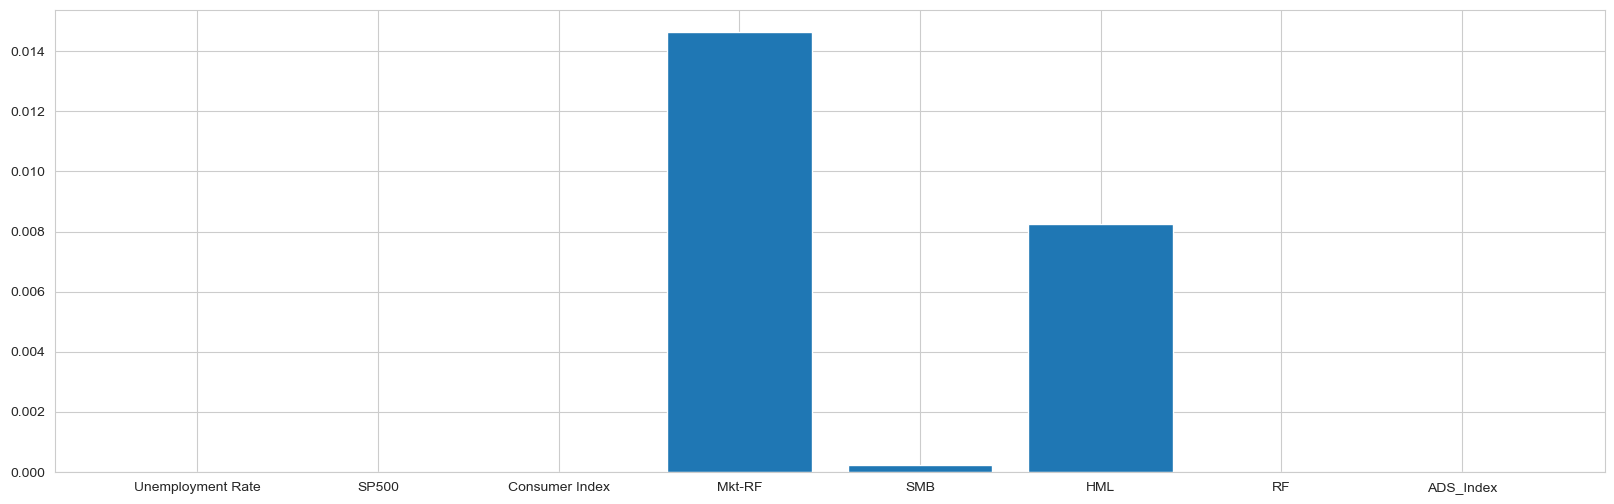

In [36]:
plt.bar(['Unemployment Rate','SP500','Consumer Index','Mkt-RF','SMB','HML','RF','ADS_Index'], importance)
plt.show()

# LARS

In [37]:
import numpy as np
from sklearn.linear_model import Lars
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create and fit the LARS regression model
lars_model = Lars()
lars_model.fit(X_train, y_train)

# Extract feature importance from coefficients
feature_importance = np.abs(lars_model.coef_)

feature_importance

array([1.81928541e-04, 4.68864735e-06, 3.05497252e-04, 1.30640366e-02,
       1.35622716e-03, 1.02255140e-02, 2.86031507e-01, 7.12720335e-05])

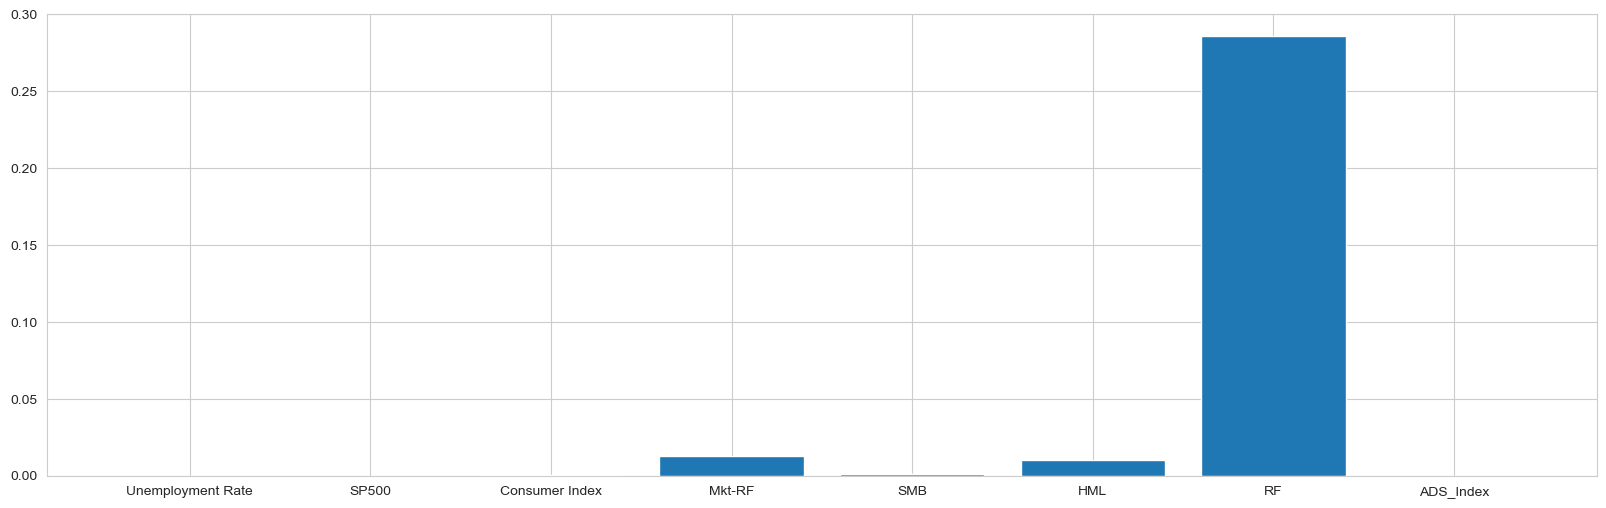

In [38]:
plt.bar(['Unemployment Rate','SP500','Consumer Index','Mkt-RF','SMB','HML','RF','ADS_Index'], feature_importance)
plt.show()

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
# define the model
rf_model = RandomForestRegressor(bootstrap=True, criterion='squared_error',
           max_features='auto',min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100,random_state=0, verbose=0)

# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [40]:
# 1. average feature importance
df_feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, 
                                     columns=['feature importance']).sort_values('feature importance', ascending=False)
print(df_feature_importance)

                   feature importance
Mkt-RF                       0.474890
HML                          0.209146
SMB                          0.081514
SP500                        0.073175
ADS_Index                    0.068676
Consumer Index               0.037335
Unemployment Rate            0.036417
RF                           0.018847


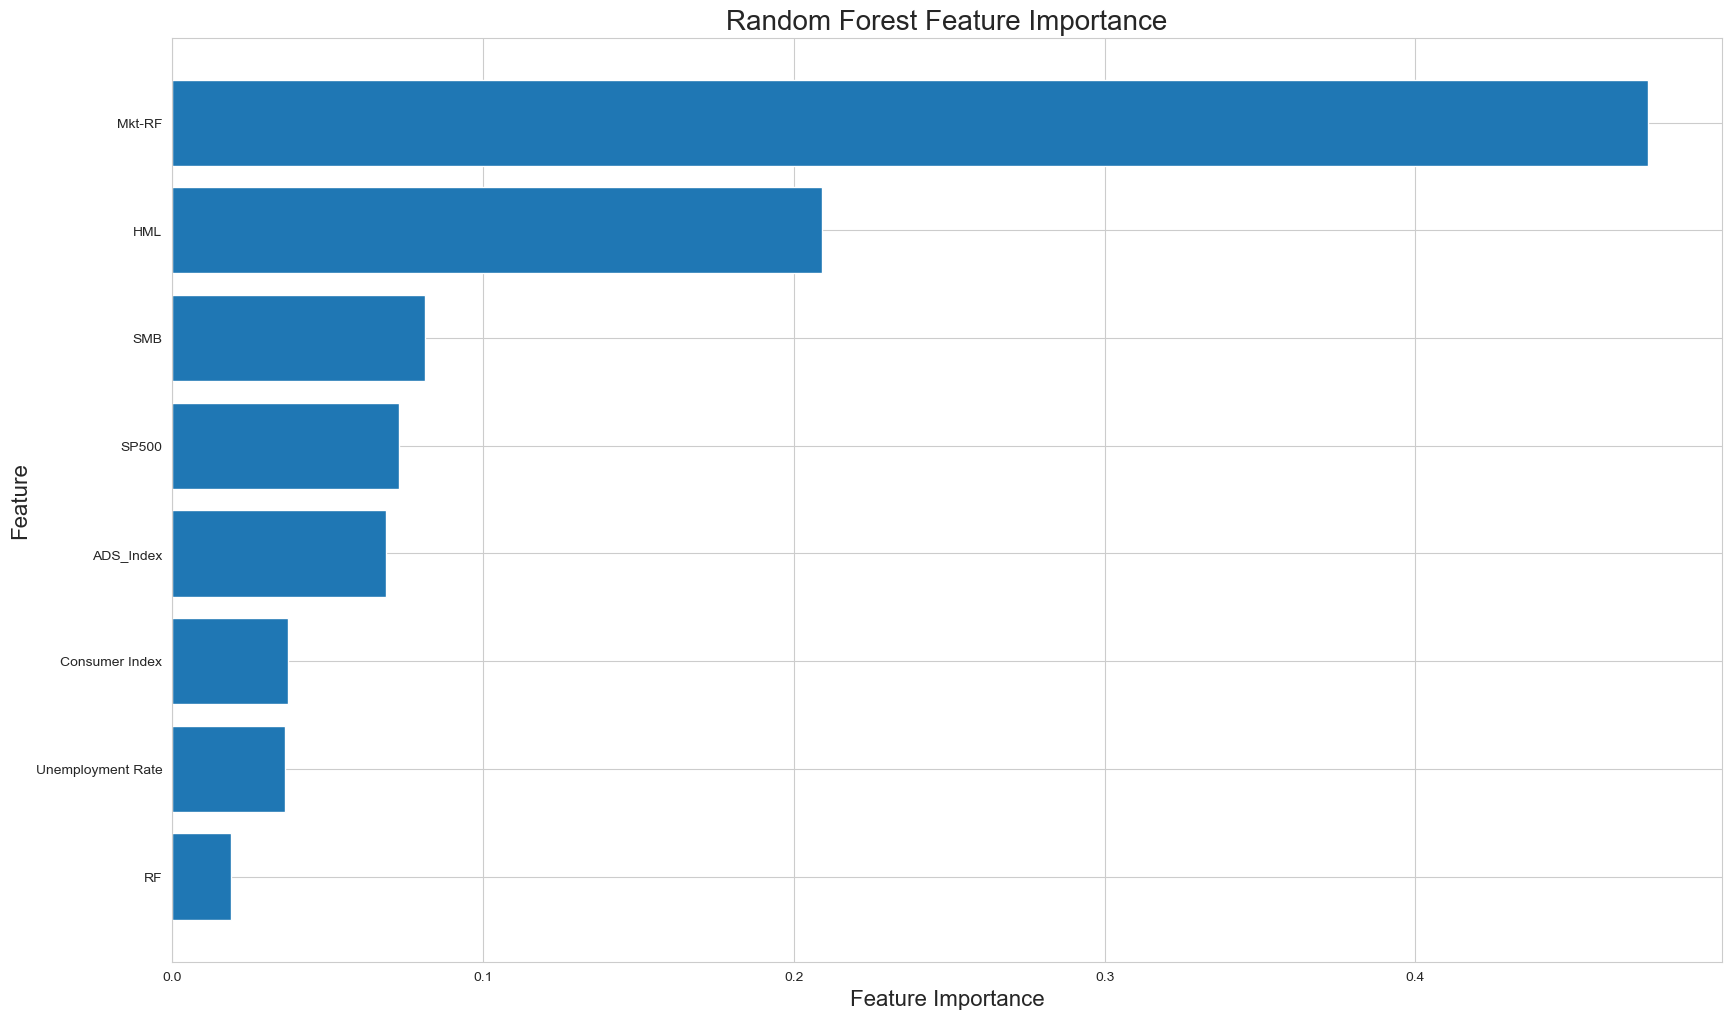

In [41]:
plt.rcParams['figure.figsize'] = (20,12)
importances = rf_model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
plt.barh(range(X_train.shape[1]), importances[sorted_idx][::-1], align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx][::-1])
plt.title('Random Forest Feature Importance', fontsize=20)
plt.xlabel('Feature Importance', fontsize=16)
plt.ylabel('Feature' ,fontsize=16)
plt.show()

# XGBoost

In [42]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [5, 10],
              "n_estimators": [10, 50, 100],
              "learning_rate": [0.15, 0.3]}

# try out every combination of the above values
xgb_model = xgb.XGBRegressor(eval_metric='rmse')
search = GridSearchCV(xgb_model, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)
xgb_model = xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

xgb_model.fit(X_train, y_train)

The best hyperparameters are  {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 10}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

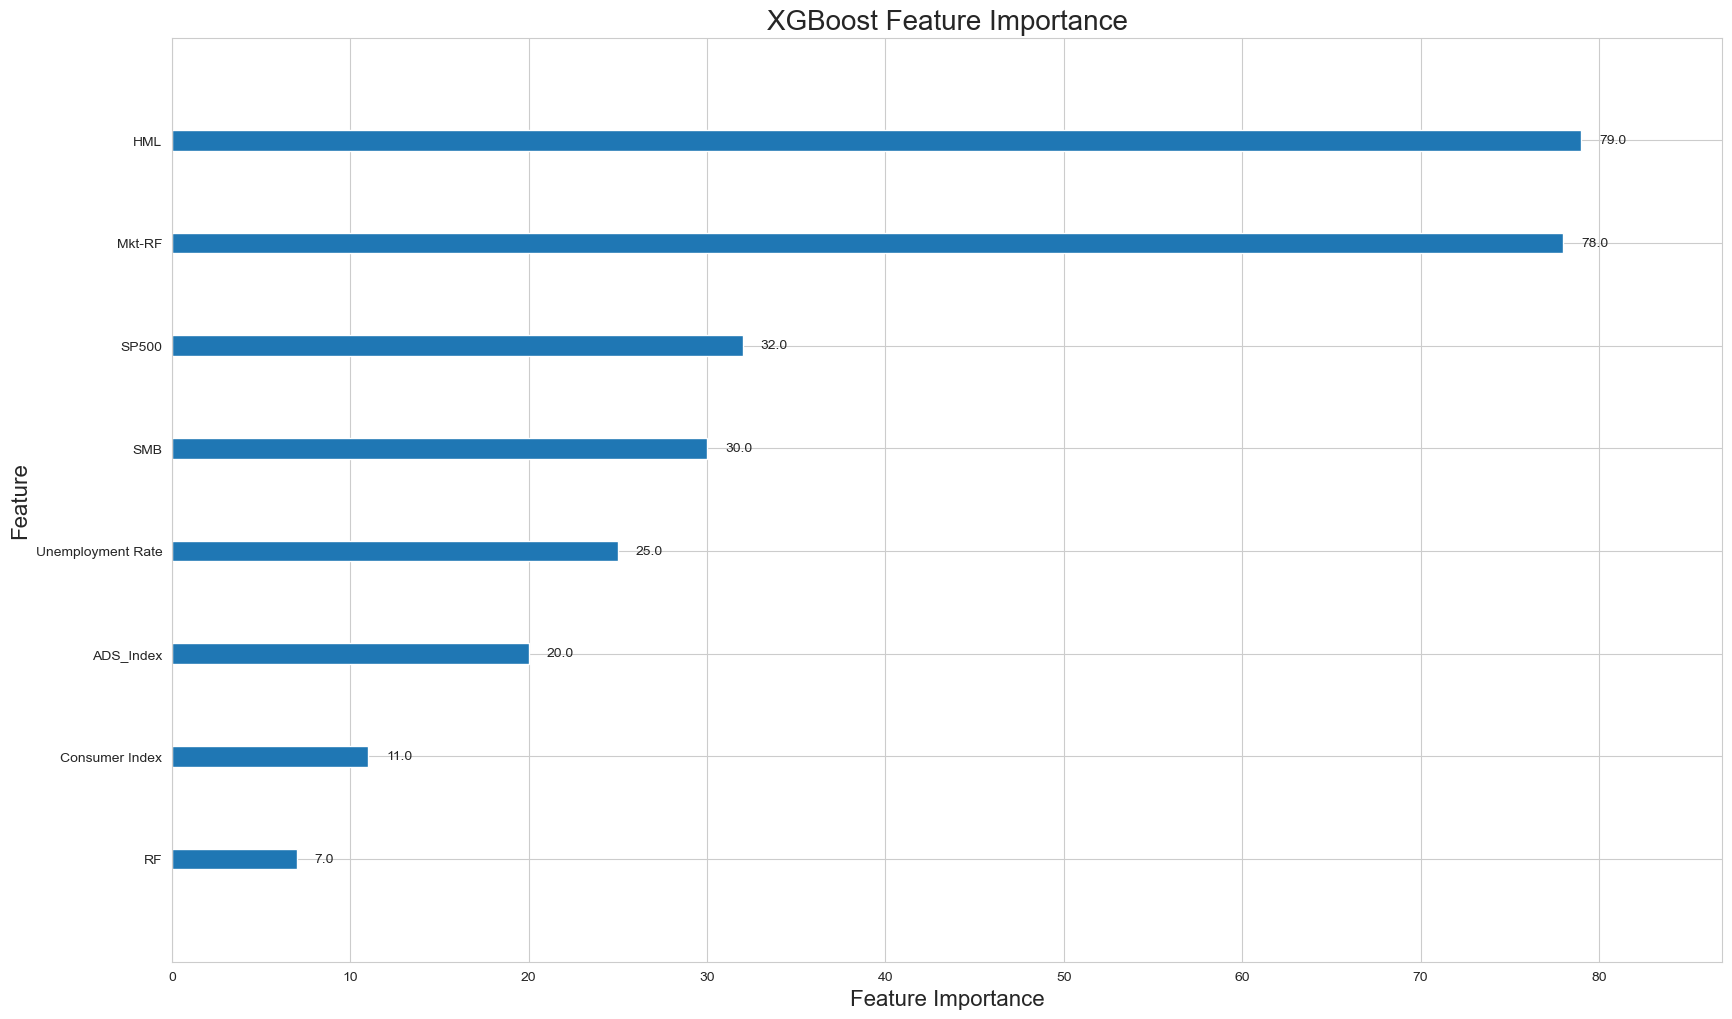

In [43]:
fig, ax = plt.subplots(figsize=(20,12))
plot_importance(xgb_model, ax=ax)
plt.title('XGBoost Feature Importance', fontsize=20)
plt.xlabel('Feature Importance', fontsize=16)
plt.ylabel('Feature' ,fontsize=16)
plt.show();

# 4. Proposed and train 3-6 models by feeding in the features you prepared in step 2.  Compare the model performance using RMSE between the fitted Y and actual Y in testing period.

## Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression as LR
# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

RMSE:  0.019544105914978044


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 score: ", r2)

MSE:  0.00038197207601587974
RMSE:  0.019544105914978044
MAE:  0.013505175881512675
R2 score:  0.5619142162560323


In [46]:
df = pd.DataFrame(y_pred, columns=['y_pred'])
df2 = pd.DataFrame(y_test, columns=['y_test'])
df3 = pd.concat([df, df2], axis=1)
df3

y_pred    y_test
0    0.001085 -0.042467
1   -0.041974 -0.042467
2   -0.059158 -0.053008
3   -0.018912  0.002232
4   -0.029850 -0.013416
..        ...       ...
455 -0.034841 -0.044671
456 -0.036199  0.038446
457 -0.007789  0.005539
458  0.006027  0.025889
459  0.003585  0.023141

[460 rows x 2 columns]

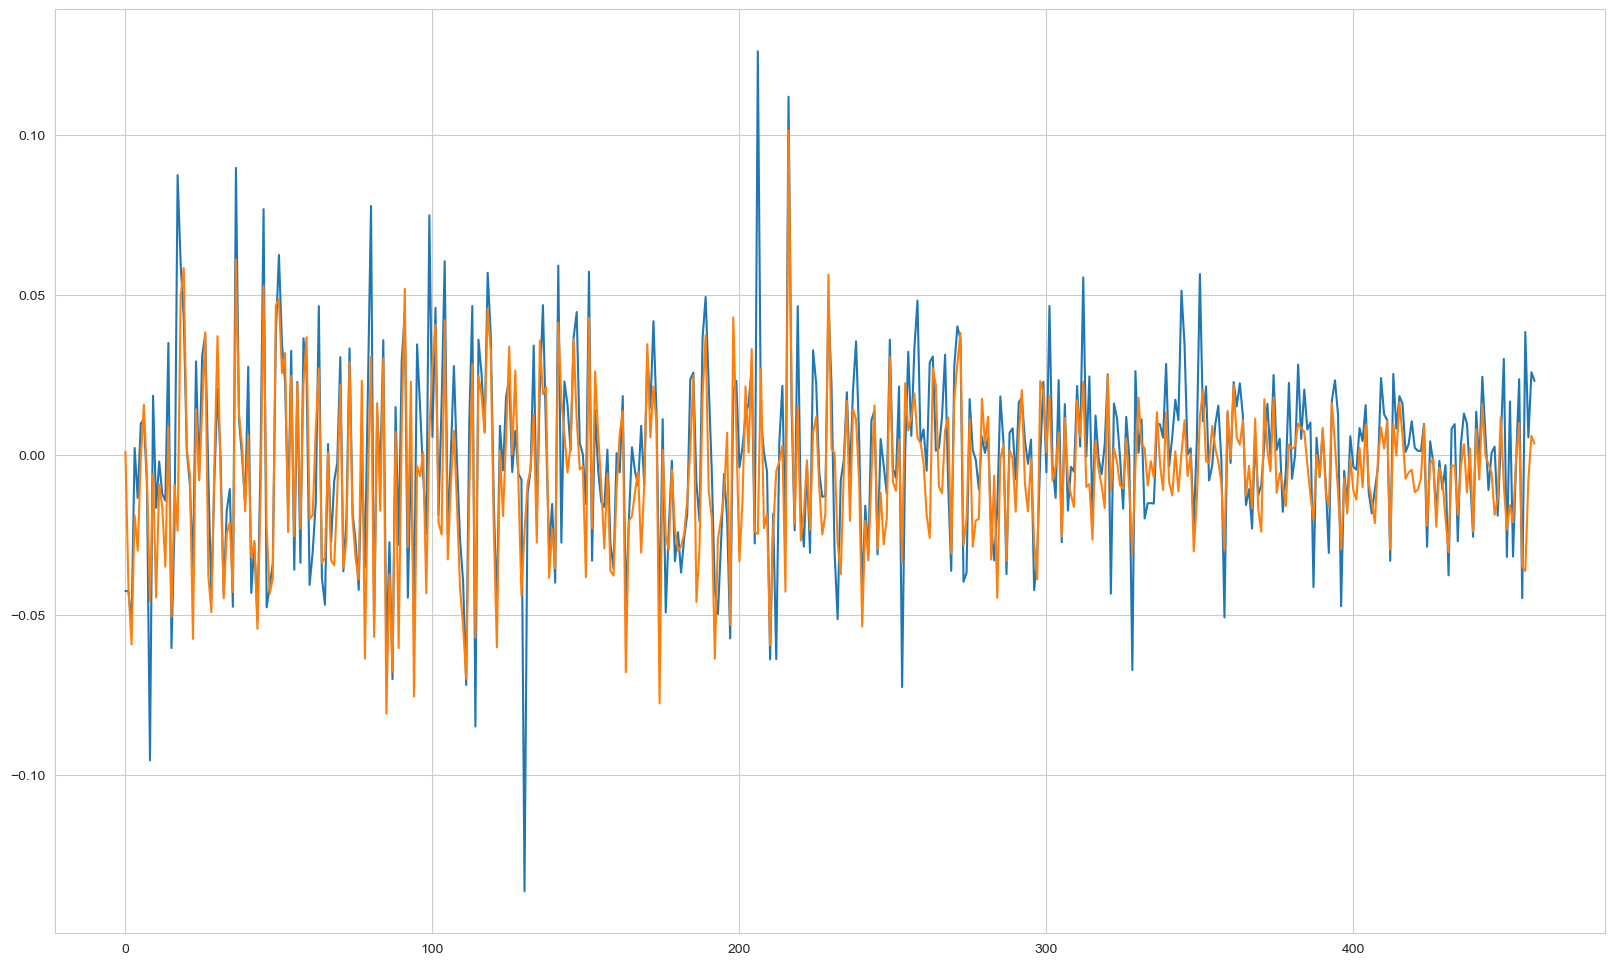

In [47]:
plt.figure(figsize=(20, 12))
plt.plot(df3.index, df3['y_test'], label='Actual Prices')
plt.plot(df3.index, df3['y_pred'], label='Predicted Prices')

# XGBoost

In [48]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [5, 10],
              "n_estimators": [10, 50, 100],
              "learning_rate": [0.15, 0.3]}

# try out every combination of the above values
xgb_model = xgb.XGBRegressor(eval_metric='rmse')
search = GridSearchCV(xgb_model, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)
xgb_model = xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

xgb_model.fit(X_train, y_train)


The best hyperparameters are  {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 10}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
from sklearn.metrics import mean_squared_error as MSE
# make predictions for test data
y_pred = xgb_model.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.019863


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 score: ", r2)

MSE:  0.00039451915720605944
RMSE:  0.019862506317332145
MAE:  0.013309875366968472
R2 score:  0.5475239028220458


In [51]:
df = pd.DataFrame(y_pred, columns=['y_pred'])
df2 = pd.DataFrame(y_test, columns=['y_test'])
df3 = pd.concat([df, df2], axis=1)
df3

y_pred    y_test
0    0.003034 -0.042467
1   -0.020550 -0.042467
2   -0.041743 -0.053008
3   -0.018110  0.002232
4   -0.026344 -0.013416
..        ...       ...
455 -0.030162 -0.044671
456 -0.025914  0.038446
457  0.000606  0.005539
458  0.014013  0.025889
459  0.010420  0.023141

[460 rows x 2 columns]

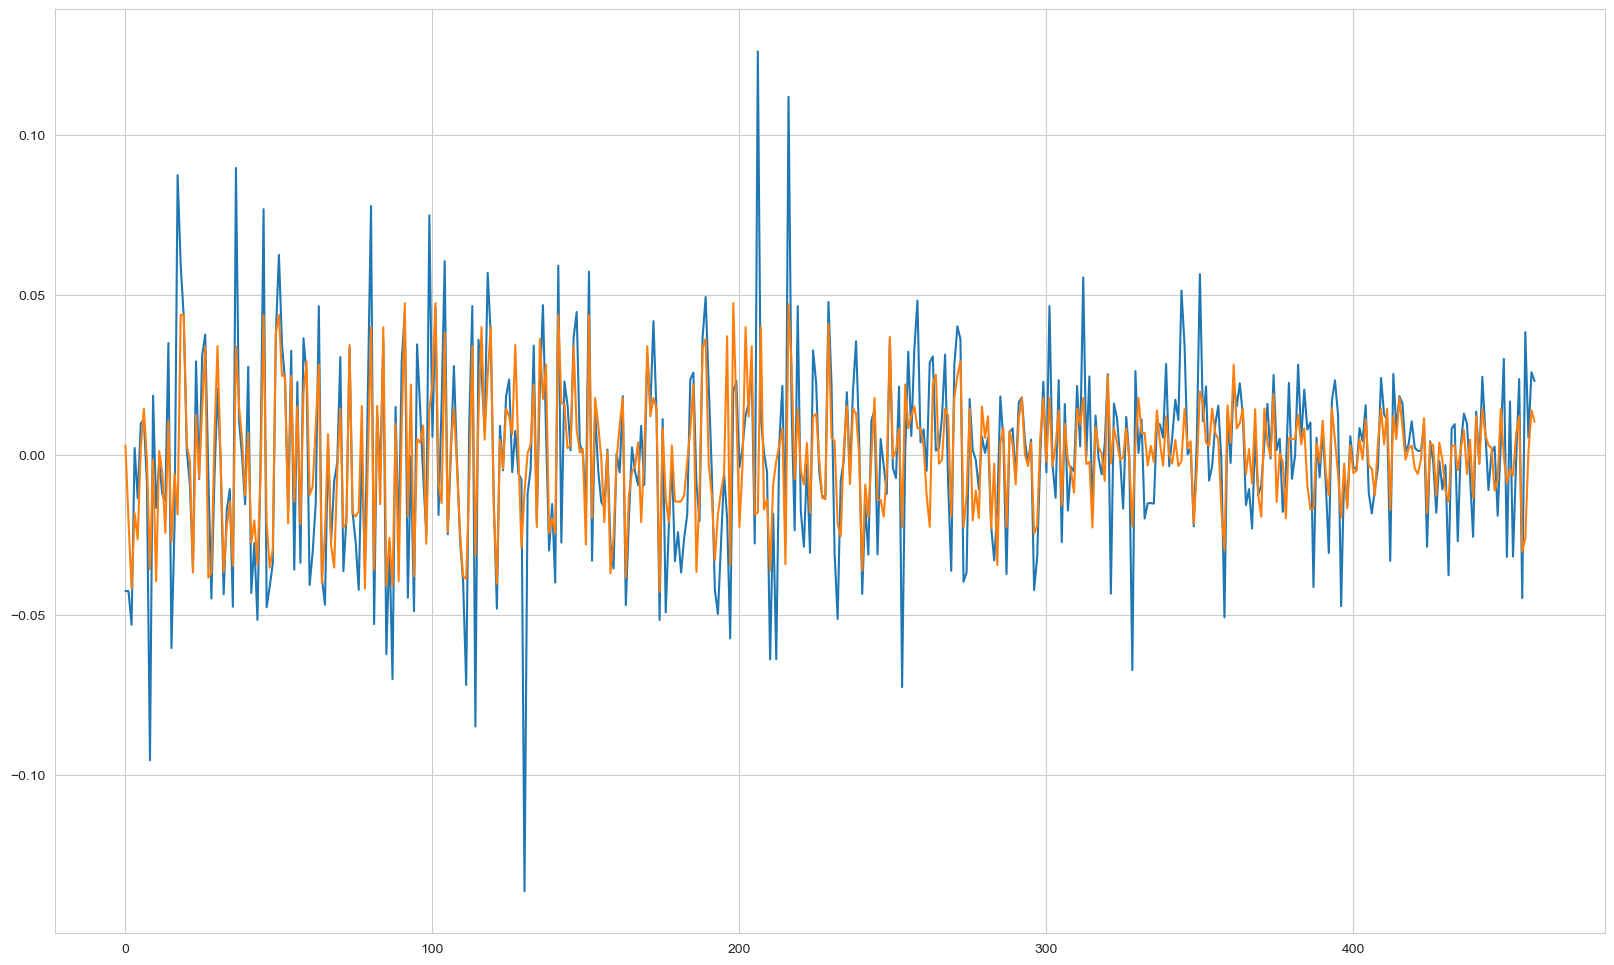

In [52]:
plt.figure(figsize=(20, 12))
plt.plot(df3.index, df3['y_test'], label='Actual Prices')
plt.plot(df3.index, df3['y_pred'], label='Predicted Prices')

# GradientBoosting Regressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
reg2 = GBR(n_estimators=100,max_depth=5,max_features='auto',random_state=0)
reg2.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = reg2.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

RMSE:  0.0207780093839121


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 score: ", r2)

MSE:  0.0004317256739579393
RMSE:  0.0207780093839121
MAE:  0.014196534311313912
R2 score:  0.5048515529957387


In [55]:
df = pd.DataFrame(y_pred, columns=['y_pred'])
df2 = pd.DataFrame(y_test, columns=['y_test'])
df3 = pd.concat([df, df2], axis=1)
df3

y_pred    y_test
0    0.001332 -0.042467
1   -0.047100 -0.042467
2   -0.063449 -0.053008
3   -0.025057  0.002232
4   -0.043240 -0.013416
..        ...       ...
455 -0.043813 -0.044671
456 -0.040768  0.038446
457  0.004932  0.005539
458  0.014085  0.025889
459  0.013937  0.023141

[460 rows x 2 columns]

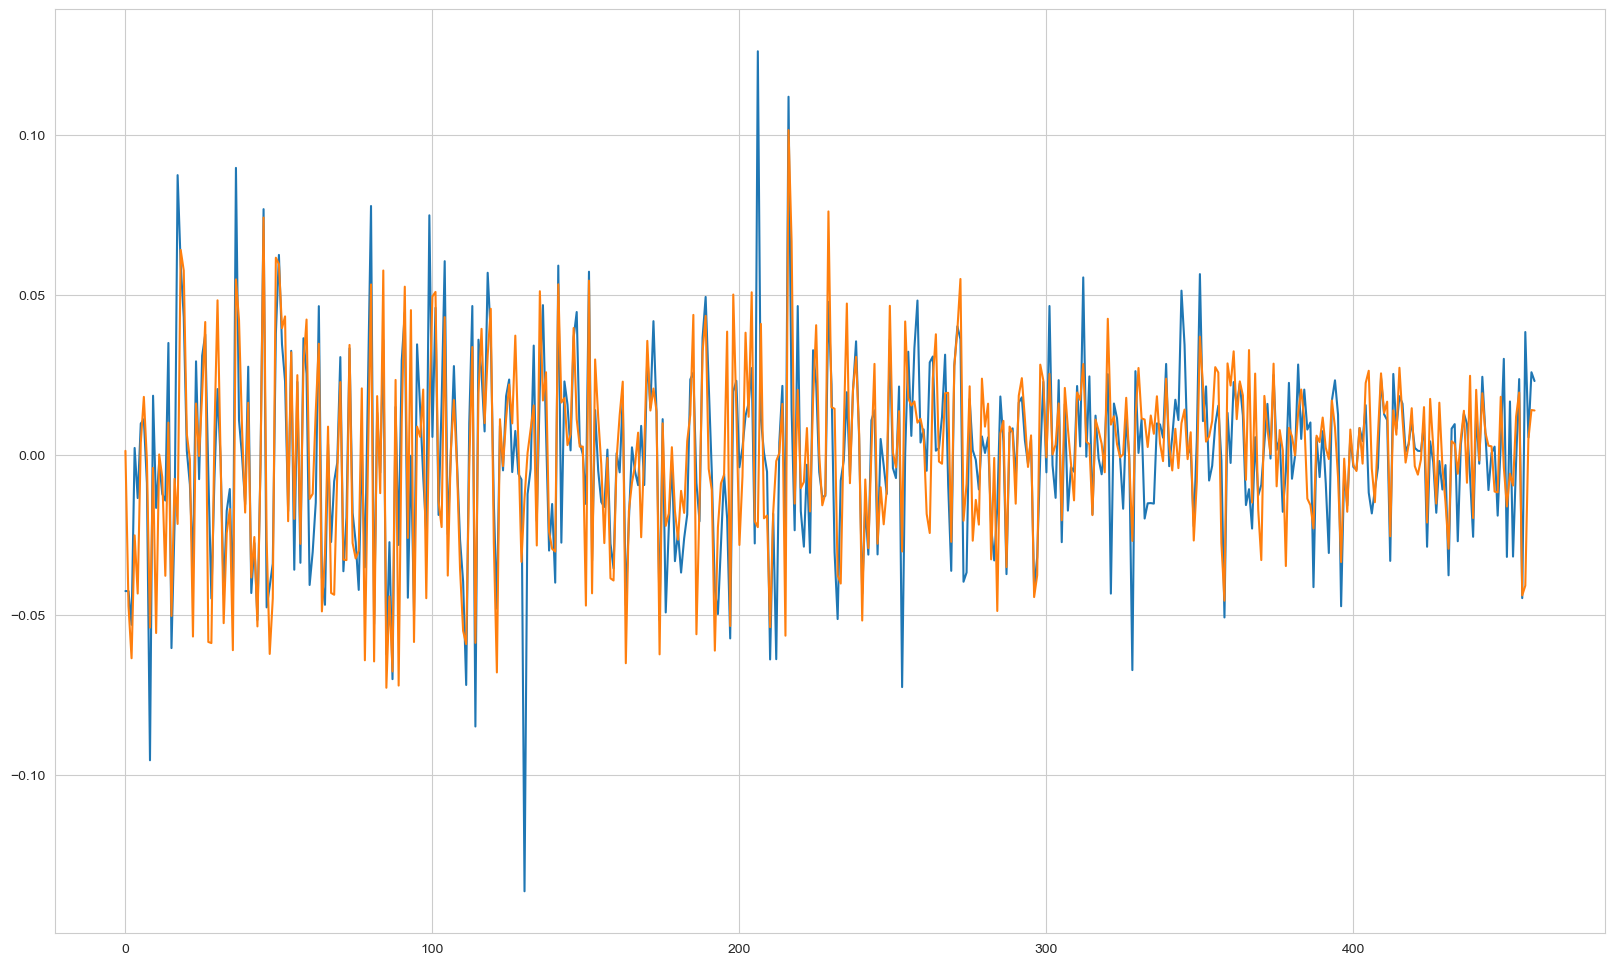

In [56]:
plt.figure(figsize=(20, 12))
plt.plot(df3.index, df3['y_test'], label='Actual Prices')
plt.plot(df3.index, df3['y_pred'], label='Predicted Prices')

# Fama French 3

In [57]:

#Importing Packages
 
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import scipy.stats as ss

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [58]:
df_now = pd.read_csv ('feature_database.csv')
df_now

Unnamed: 0        date        Open        High         Low       Close  \
0              0  2015-01-02   67.809998   68.489998   66.269997   67.379997   
1              1  2015-01-05   66.570000   68.370003   66.430000   67.150002   
2              2  2015-01-06   67.180000   67.870003   65.169998   66.330002   
3              3  2015-01-07   66.910004   67.470001   66.000000   67.089996   
4              4  2015-01-08   67.870003   69.080002   67.440002   68.889999   
...          ...         ...         ...         ...         ...         ...   
2218        2218  2023-10-25  549.369995  552.099976  527.239990  530.169983   
2219        2219  2023-10-26  560.000000  579.000000  548.859985  550.950012   
2220        2220  2023-10-27  556.460022  564.000000  548.440002  554.010010   
2221        2221  2023-10-30  559.599976  572.169983  558.090027  568.539978   
2222        2222  2023-10-31  570.869995  584.840027  564.900024  581.849976   

       Adj Close   Volume  Unemployment Rate  Consumer Index    SP500  Mkt-RF  \
0      67.379997   815800                5.7         234.747  2058.20   -0.12   
1      67.150002   800500                5.7         234.747  2020.58   -1.84   
2      66.330002   855900                5.7         234.747  2002.61   -1.04   
3      67.089996   623000                5.7         234.747  2025.90    1.19   
4      68.889999   637100                5.7         234.747  2062.14    1.81   
...          ...      ...                ...             ...      ...     ...   
2218  530.169983  2008900                3.9         307.619  4186.77   -1.58   
2219  550.950012  3548000                3.9         307.619  4137.23   -1.15   
2220  554.010010  1755800                3.9         307.619  4117.37   -0.53   
2221  568.539978  1448200                3.9         307.619  4166.82    1.15   
2222  581.849976  1615500                3.9         307.619  4193.80    0.63   

       SMB   HML   RMW   CMA     RF  ADS_Index  Yest_Close  
0    -0.57  0.08 -0.25  0.12  0.000  -0.192472         NaN  
1     0.25 -0.68  0.16 -0.08  0.000  -0.235984   67.379997  
2    -0.78 -0.31  0.53  0.02  0.000  -0.248888   67.150002  
3     0.17 -0.66  0.25 -0.14  0.000  -0.260993   66.330002  
4    -0.10 -0.28  0.11 -0.16  0.000  -0.272305   67.089996  
...    ...   ...   ...   ...    ...        ...         ...  
2218 -0.02  0.84  1.50  0.20  0.021  -0.529790  554.390015  
2219  1.19  1.66 -0.76  0.48  0.021  -0.521524  530.169983  
2220 -0.58 -0.57  0.42 -0.96  0.021  -0.511475  550.950012  
2221 -0.34  0.28 -0.14  0.17  0.021  -0.471021  554.010010  
2222  0.06 -0.08 -0.83  0.06  0.021  -0.454659  568.539978  

[2223 rows x 19 columns]

In [59]:
df_now = df_now[df_now['Yest_Close'].notna()]
df_now = df_now[df_now['Mkt-RF'].notna()]
df_now = df_now[df_now['SMB'].notna()]
df_now = df_now[df_now['HML'].notna()]
df_now = df_now[df_now['RF'].notna()]
df_now

Unnamed: 0        date        Open        High         Low       Close  \
1              1  2015-01-05   66.570000   68.370003   66.430000   67.150002   
2              2  2015-01-06   67.180000   67.870003   65.169998   66.330002   
3              3  2015-01-07   66.910004   67.470001   66.000000   67.089996   
4              4  2015-01-08   67.870003   69.080002   67.440002   68.889999   
5              5  2015-01-09   69.279999   69.279999   66.230003   67.110001   
...          ...         ...         ...         ...         ...         ...   
2218        2218  2023-10-25  549.369995  552.099976  527.239990  530.169983   
2219        2219  2023-10-26  560.000000  579.000000  548.859985  550.950012   
2220        2220  2023-10-27  556.460022  564.000000  548.440002  554.010010   
2221        2221  2023-10-30  559.599976  572.169983  558.090027  568.539978   
2222        2222  2023-10-31  570.869995  584.840027  564.900024  581.849976   

       Adj Close   Volume  Unemployment Rate  Consumer Index    SP500  Mkt-RF  \
1      67.150002   800500                5.7         234.747  2020.58   -1.84   
2      66.330002   855900                5.7         234.747  2002.61   -1.04   
3      67.089996   623000                5.7         234.747  2025.90    1.19   
4      68.889999   637100                5.7         234.747  2062.14    1.81   
5      67.110001  1037100                5.7         234.747  2044.81   -0.85   
...          ...      ...                ...             ...      ...     ...   
2218  530.169983  2008900                3.9         307.619  4186.77   -1.58   
2219  550.950012  3548000                3.9         307.619  4137.23   -1.15   
2220  554.010010  1755800                3.9         307.619  4117.37   -0.53   
2221  568.539978  1448200                3.9         307.619  4166.82    1.15   
2222  581.849976  1615500                3.9         307.619  4193.80    0.63   

       SMB   HML   RMW   CMA     RF  ADS_Index  Yest_Close  
1     0.25 -0.68  0.16 -0.08  0.000  -0.235984   67.379997  
2    -0.78 -0.31  0.53  0.02  0.000  -0.248888   67.150002  
3     0.17 -0.66  0.25 -0.14  0.000  -0.260993   66.330002  
4    -0.10 -0.28  0.11 -0.16  0.000  -0.272305   67.089996  
5    -0.03 -0.47 -0.12 -0.16  0.000  -0.282826   68.889999  
...    ...   ...   ...   ...    ...        ...         ...  
2218 -0.02  0.84  1.50  0.20  0.021  -0.529790  554.390015  
2219  1.19  1.66 -0.76  0.48  0.021  -0.521524  530.169983  
2220 -0.58 -0.57  0.42 -0.96  0.021  -0.511475  550.950012  
2221 -0.34  0.28 -0.14  0.17  0.021  -0.471021  554.010010  
2222  0.06 -0.08 -0.83  0.06  0.021  -0.454659  568.539978  

[2222 rows x 19 columns]

(2222, 4)
[[-0.00341341]
 [-0.01221146]
 [ 0.01145778]
 ...
 [ 0.00555404]
 [ 0.02622691]
 [ 0.02341084]]
 REGRESSION STATISTICS  

------------------------


 Joint significance of all coefficients
 [array([[4.49195359e-11]]), array([[1.]])]
Beta Values    
 [[ 0.0006752 ]
 [ 0.012994  ]
 [ 0.00096216]
 [-0.00965585]]
P values       
 [[0.48434685 0.19036492 0.48602326 0.69060291]]
R-Square is       
 [[0.53050391]]
Adjusted R Square 
 [[0.52986888]]
Standard Error    
 [[0.01719129]]
Observations      
 2222
-------------------------



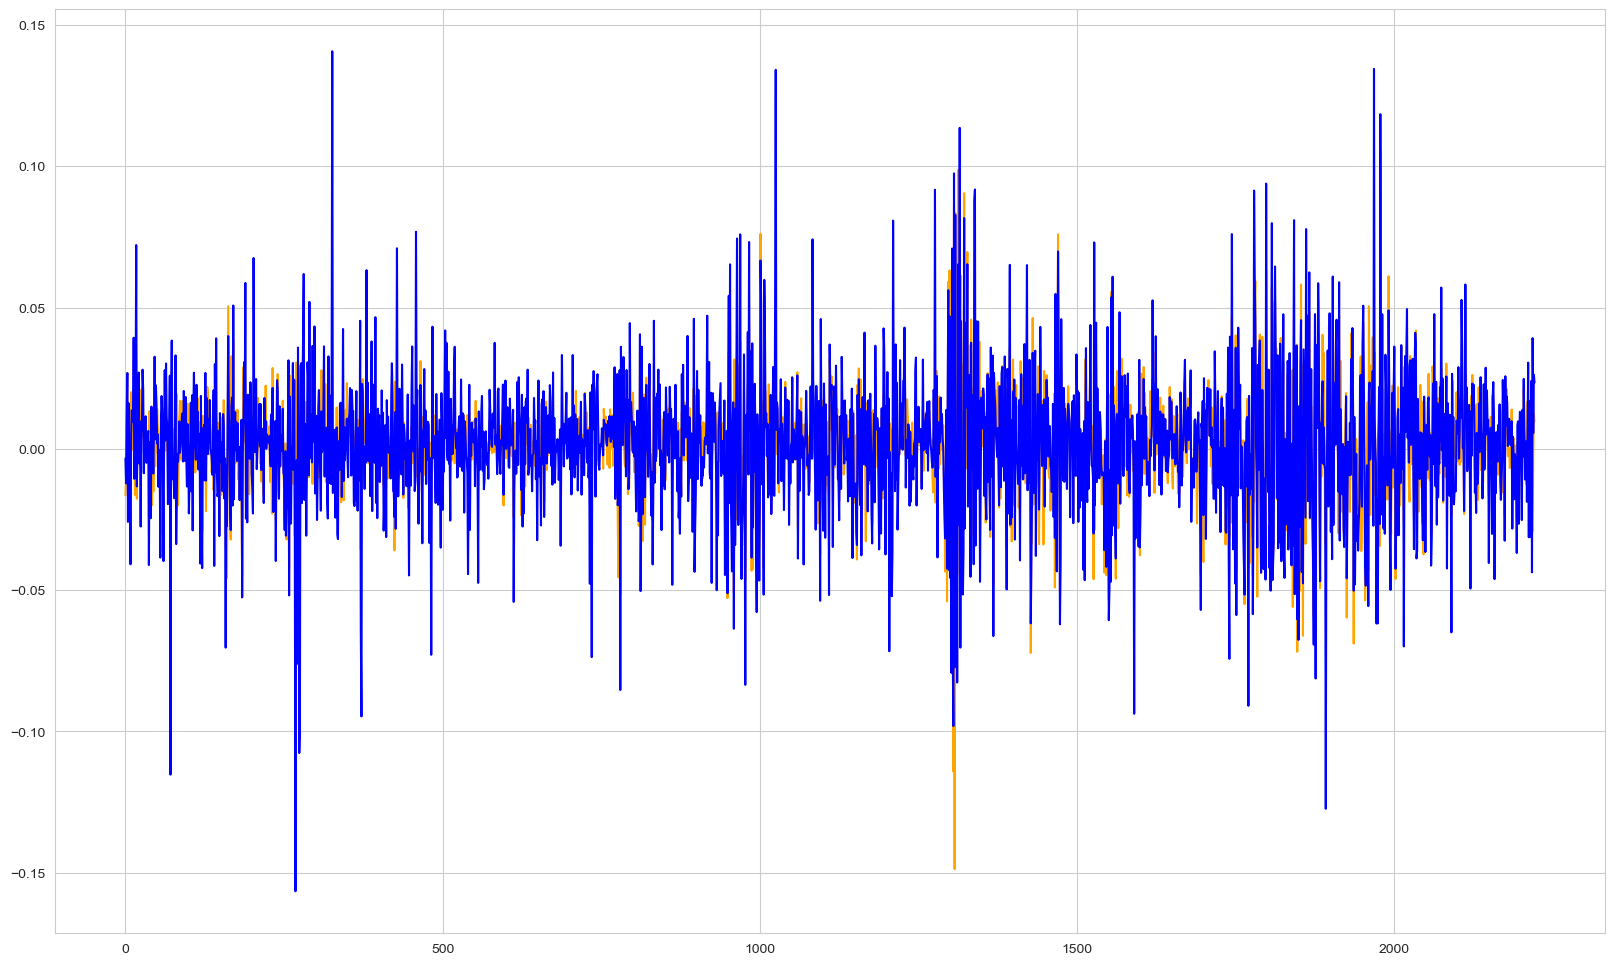

<AxesSubplot:title={'center':'Predictions using FF3 using Linear Regression'}>

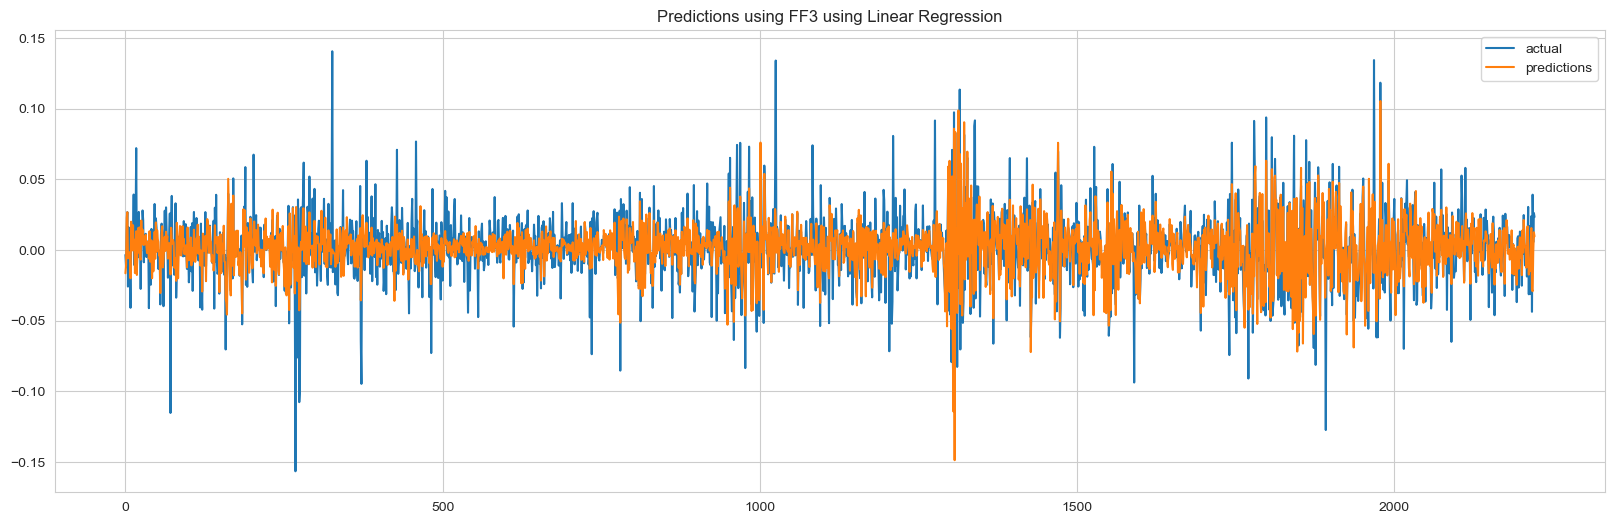

In [60]:
df_now['stock_return'] = (df_now['Adj Close']-df_now['Yest_Close'])/(df_now['Yest_Close'])


T = df_now.shape[0]
Y = df_now['stock_return'].values
columns = ['Mkt-RF','SMB','HML']
X=df_now[columns]
X = np.column_stack([np.ones((len(X),1)),X])
N = X.shape
print(N)
Y=np.asarray(Y)
Y = Y.reshape(2222,1)

# 'REGRESSION STARTS:'       
# 'Linear Regression of Y: T x 1 on' 
# 'Regressors X: T x N'

invXX = np.linalg.inv(X.transpose()@X)

# 'OLS estimator beta: N x 1'
print(Y)
beta_hat = invXX@X.transpose()@Y

# 'Predictive value of Y_t using OLS'  

y_hat = X@beta_hat;       

#'Residuals from OLS: Y - X*beta'        

residuals = Y - y_hat;            

#'variance of Y_t or residuals'

sigma2 = (1/T)*(residuals.transpose()@residuals)

#'standard deviation of Y_t or residuals'

sig = np.sqrt(sigma2) 

# 'variance-covariance matrix of beta_hat'
# 'N x N: on-diagnal variance(beta_j)'
# 'N x N: off-diagnal cov(beta_i, beta_j)'

varcov_beta_hat = (sigma2)*invXX
var_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

# 'Calculate R-square'

R_square = 1 - residuals.transpose()@residuals/(T*np.var(Y))

adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])


# 'Test Each Coefficient: beta_i'

# 't-test stat: N x 1'

t_stat = beta_hat.transpose()/var_beta_hat

# ' t-test significance level: N x 1'

p_val_t = 1-ss.norm.cdf(t_stat)

# 'Test of Joint Significance of Model'

F_stat = beta_hat.transpose()@varcov_beta_hat@beta_hat/\
         (residuals.transpose()@residuals)
# 'size: (1 x N)*(N x N)*(N x 1)/((1 x T) * (T x 1)) = 1 x 1'

p_val_F = 1-ss.f.cdf(F_stat,N[1]-1,T-N[1])



print(' REGRESSION STATISTICS  \n') 
print('------------------------\n')
print('\n Joint significance of all coefficients\n',[F_stat,p_val_F])
print('Beta Values    \n',beta_hat)
print('P values       \n',p_val_t)
print('R-Square is       \n',R_square)
print('Adjusted R Square \n',adj_R_square)
print('Standard Error    \n',sig)
print('Observations      \n',T) 
print('-------------------------\n')

plt.plot(y_hat, color='orange')
plt.plot(Y, color = 'blue')
plt.show()
pred = pd.DataFrame(y_hat)
act = pd.DataFrame(Y)

plot_df = pd.DataFrame({"actual": act[0], "predictions": pred[0]})

plot_df
plot_df.plot(figsize=(20, 6), title='Predictions using FF3 using Linear Regression')


In [61]:
mse = mean_squared_error(Y,y_hat)
rmse = np.sqrt(mse)
print('RMSE-------',rmse)
print('R-Squared--',r2_score(Y,y_hat))

RMSE------- 0.017191292093611633
R-Squared-- 0.530503910483461


### Random Forest

In [62]:
# define the model
rf_model = RandomForestRegressor(bootstrap=True, criterion='squared_error',
           max_features='auto',min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100,random_state=0, verbose=0)

# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [63]:
# make predictions for test data
y_pred = rf_model.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.020428


In [64]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 score: ", r2)

MSE:  0.00041729843689160197
RMSE:  0.02042788380845167
MAE:  0.013940671496333074
R2 score:  0.521398227096606


In [65]:
df = pd.DataFrame(y_pred, columns=['y_pred'])
df2 = pd.DataFrame(y_test, columns=['y_test'])
df3 = pd.concat([df, df2], axis=1)
df3

y_pred    y_test
0    0.001806 -0.042467
1   -0.033044 -0.042467
2   -0.057234 -0.053008
3   -0.024513  0.002232
4   -0.041050 -0.013416
..        ...       ...
455 -0.040410 -0.044671
456 -0.032433  0.038446
457  0.008941  0.005539
458  0.013701  0.025889
459  0.011314  0.023141

[460 rows x 2 columns]

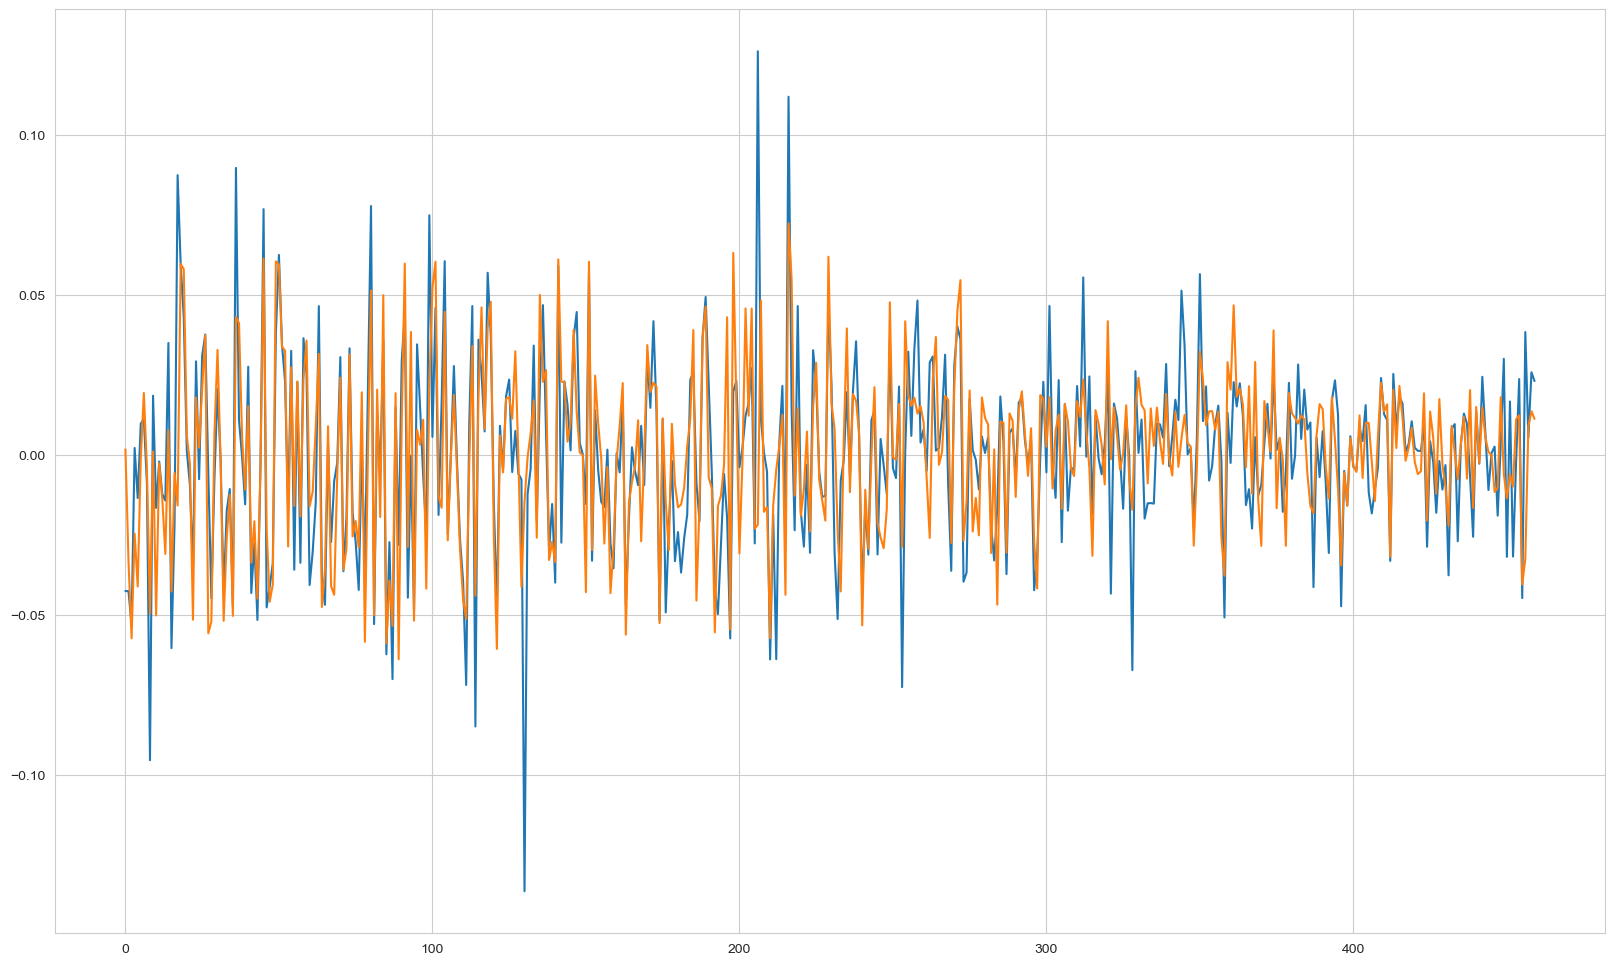

In [66]:
plt.figure(figsize=(20, 12))
plt.plot(df3.index, df3['y_test'], label='Actual Prices')
plt.plot(df3.index, df3['y_pred'], label='Predicted Prices')

### Long-Short Term Memory

In [67]:
# df = yf.download('NOW','2018-01-01','2023-11-30') 

In [68]:
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense, Activation


In [69]:
# # Create a new dataframe with only the 'Close' column.
# data = df.filter(['Close'])

# # Converting the dataframe to a numpy array.
# dataset = data.values

# # Compute the number of rows to train the model on.

# training_data_len = math.ceil( len(dataset) *.8)

In [70]:

# # Min-Max Normalization.
# scaler = MinMaxScaler(feature_range=(0, 1)) 
# scaled_data = scaler.fit_transform(dataset)

In [71]:
# # Create the scaled training dataset.
# train_data = scaled_data[0:training_data_len, :]

# # Split the data into X_train and y_train data sets
# X_train=[]
# y_train = []

# for i in range(60,len(train_data)):
#     X_train.append(train_data[i-60:i,0])
#     y_train.append(train_data[i,0])

In [72]:
# # Convert x_train and y_train to numpy arrays.
# X_train, y_train = np.array(X_train), np.array(y_train)

In [73]:
# # Reshape the data into the shape accepted by the LSTM.
# X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [74]:
# !pip install tensorflow

In [75]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential


# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(LSTM(units=25, return_sequences=False))
# model.add(Activation('linear'))
# model.add(Dense(units=1))
# model.summary()

In [76]:
# # Compile the model.
# model.compile(optimizer='adam', loss='mean_squared_error')

In [77]:
# # Train the model.
# model.fit(X_train, y_train, batch_size=5, epochs=20)

In [78]:
# # Test dataset.
# test_data = scaled_data[training_data_len-60:, :]

# # Create the x_test and y_test datasets.
# X_test = []
# y_test = []

# for i in range(60,len(test_data)):
#     X_test.append(test_data[i-60:i, 0])
#     y_test.append(test_data[i,0])

In [79]:
# # Convert x_test to a numpy array.
# X_test = np.array(X_test)

In [80]:
# # Reshape the data into the shape accepted by the LSTM.
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [81]:
# # Getting the models predicted price values.
# predictions = model.predict(X_test) 

In [82]:
# # Calculate/Get the value of RMSE.
# mse = mean_squared_error(predictions,y_test)
# rmse = math.sqrt(mse)
# r = r2_score(predictions,y_test)

In [83]:
# print('R-Squared Score = {} '.format(r))

In [84]:
# print(f"RMSE: {rmse}")
# print(f"MSE: {mse}")

In [85]:
# plt.figure(figsize=(20, 12))
# plt.plot(y_test, label='Actual Prices')
# plt.plot(predictions, label='Predicted Prices')

# 5. Include one benchmark study that uses GARCH or Kalman Filter

### GARCH

In [86]:
def GARCH(param, *args):
    "Initialize Params:"
    mu = param[0]
    omega = param[1]
    alpha = param[2]
    beta = param[3]
    T = Y.shape[0]
    GARCH_Dens = np.zeros(T)
    sigma2 = np.zeros(T)
    F = np.zeros(T)
    v = np.zeros(T)
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]);
        F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t] = sigma2[t]
        GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
                        (1/2)*(F[t]/v[t])
    Likelihood = np.sum(GARCH_Dens[1:-1])
    return Likelihood

In [87]:
def GARCH_PROD(params, Y0, T):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    Y = np.zeros(T)
    sigma2 = np.zeros(T)
    Y[0] = Y0
    sigma2[0] = 0.003
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]);
        Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    return Y

[*********************100%%**********************]  1 of 1 completed
         Current function value: -2877.247182
         Iterations: 0
         Function evaluations: 559
         Gradient evaluations: 111
RMSE values is: 0.033497456123599036


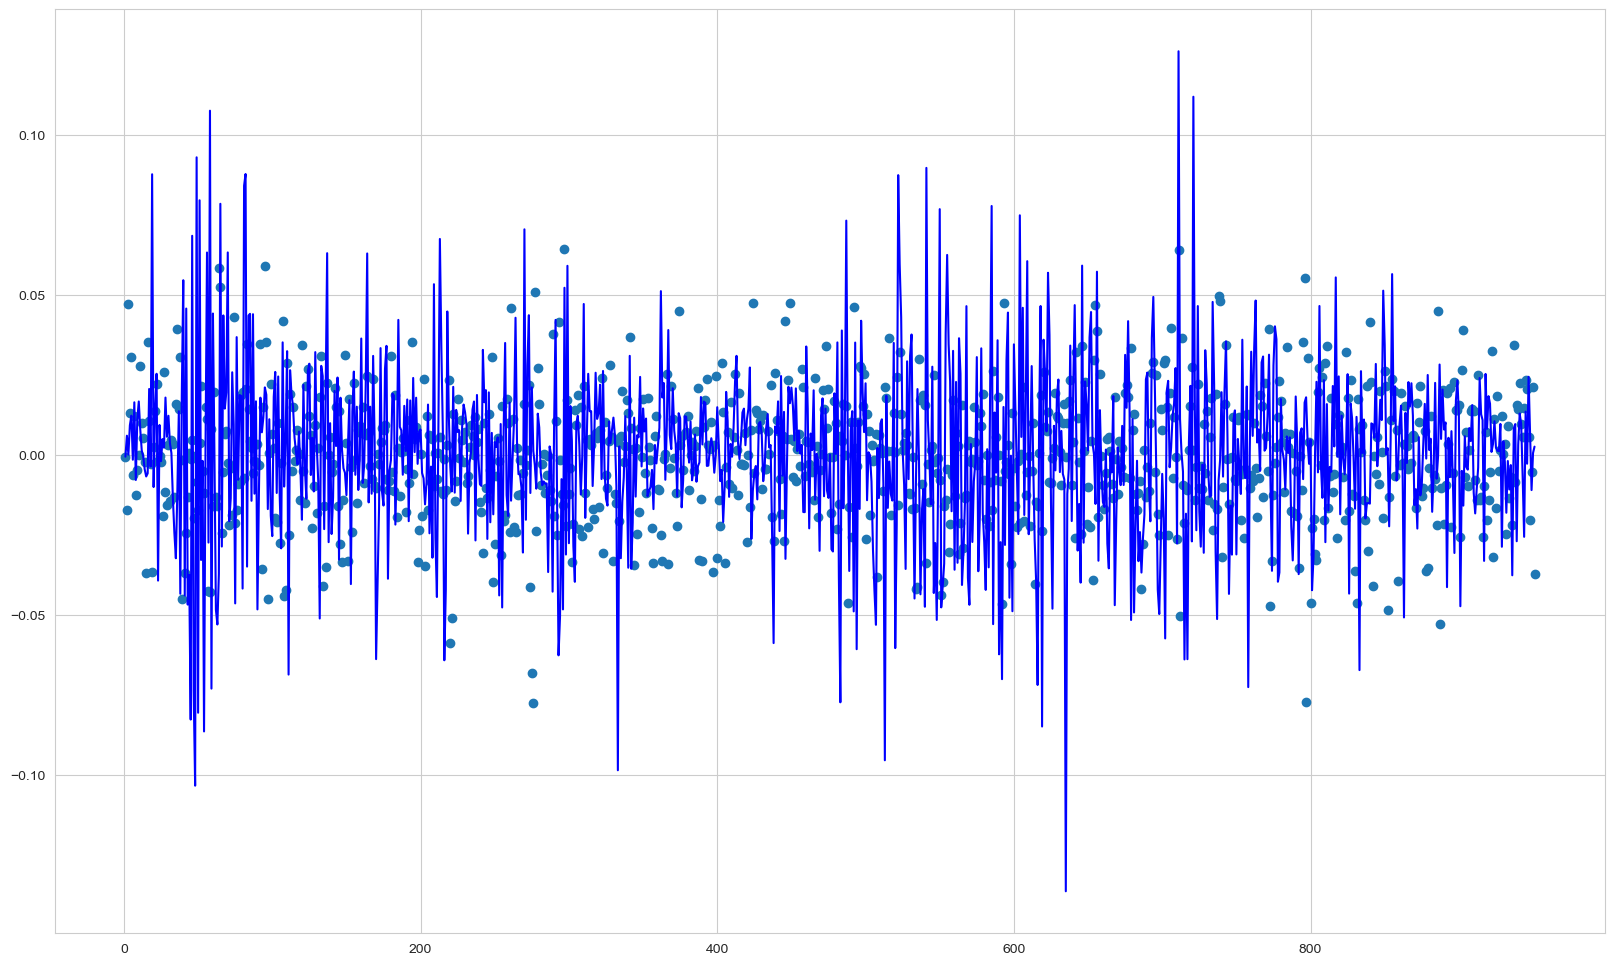

In [88]:
start_date = datetime(2020,1,1)
end_date = datetime(2023,10,13)
NOW = yf.download('NOW',start_date ,end_date)
Y = np.diff(np.log(NOW['Adj Close'].values))
T = Y.size;
param0 = np.array([np.mean(Y), np.var(Y)/3, 0.3, 0.05])
param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp':True})
Y_GARCH = GARCH_PROD(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)
plt.plot(timevec, Y_GARCH,'o',timevec, Y,'b')
RMSE = np.sqrt(np.mean((Y_GARCH - Y)**2))
print('RMSE values is:', RMSE)

In [89]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import sqrt

from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yf

## Kalman Filter

In [90]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import sqrt

from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yf

In [91]:


def Kalman_Filter(Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = param0[0]
    T = param0[1]
    H = param0[2]
    Q = param0[3]
    # "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
            Likelihood = np.sum(KF_Dens[1:-1])  
            return Likelihood

def Kalman_Smoother(params, Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            # "Please fill this part."
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    
    
            u_smooth = np.zeros(S)
            P_smooth = np.zeros(S)
            u_smooth[S-1] = u_update[S-1]
            P_smooth[S-1] = P_update[S-1]    
    for  t in range(S-1,0,-1):
     
        u_smooth[t-1] = u_update[t] +P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]- T*u_update[t])
        P_smooth[t-1] = P_update[t] + (P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_update[t])/P_update[t]*T*P_update[t])
    
    u_smooth = u_smooth[0:-1]
    return u_smooth

In [92]:
yf.pdr_override()
# Define the start and end dates
start_date = datetime(2018,1,1)
end_date = datetime(2023,11,30)

now_df = pd.DataFrame()
# Get the stock data
df_NOW = pdr.get_data_yahoo('NOW', start_date, end_date)
NOW = df_NOW
NOW = NOW.reset_index()
NOW['Date'] = pd.to_datetime(NOW['Date'])
NOW['Typical_Price'] = NOW[['High','Low','Close']].mean(axis=1)
NOW['lrets'] = (np.log(NOW.Close) - np.log(NOW.Close.shift(1))) * 100.
NOW.head()

[*********************100%%**********************]  1 of 1 completed


Date        Open        High         Low       Close   Adj Close  \
0 2018-01-02  131.000000  132.350006  130.139999  131.729996  131.729996   
1 2018-01-03  132.000000  133.250000  131.740005  132.910004  132.910004   
2 2018-01-04  133.880005  135.089996  133.779999  133.850006  133.850006   
3 2018-01-05  134.949997  135.130005  133.899994  135.009995  135.009995   
4 2018-01-08  135.050003  136.089996  134.869995  135.300003  135.300003   

    Volume  Typical_Price     lrets  
0  1282700     131.406667       NaN  
1  1580900     132.633336  0.891789  
2  1361900     134.240000  0.704758  
3  1183000     134.679998  0.862899  
4  1337200     135.419998  0.214575

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 5
         Gradient evaluations: 1


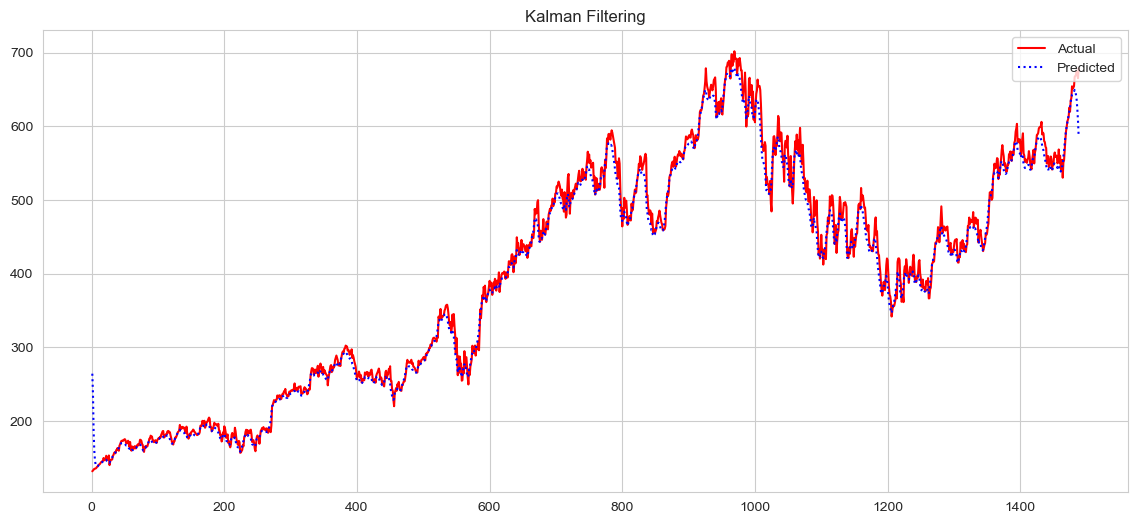

Actual   Predicted        Open       Close
Date                                                      
2018-01-02  131.729996  264.173870  131.000000  131.729996
2018-01-03  132.910004  238.079362  132.000000  132.910004
2018-01-04  133.850006  186.449008  133.880005  133.850006
2018-01-05  135.009995  159.809237  134.949997  135.009995
2018-01-08  135.300003  146.759360  135.050003  135.300003
2018-01-09  135.449997  140.904384  135.649994  135.449997
2018-01-10  136.229996  138.758572  134.960007  136.229996
2018-01-11  137.580002  138.349788  136.589996  137.580002
2018-01-12  138.190002  138.593252  137.639999  138.190002
2018-01-16  139.789993  139.359007  141.320007  139.789993

In [93]:
Y = NOW['Close']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.9, 0.8, 1.1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
y_pred = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, y_pred,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering")
plt.show()

results = pd.DataFrame({'Actual': list(Y),
                  'Predicted' : list(y_pred),
                  'Date':NOW['Date'],
                  'Open':NOW['Open'],
                  'Close':NOW['Close']
                       })


results.set_index('Date',inplace = True)
results.head(10)

# 5.1 Long Short Day trading


0 Sell at Open 9956.0 - 76 120
0 Buy Back at Close 10131.48 0


1 Buy at Open 10032.0 76 30
1 Sell at Close 10131.16 0


2 Buy at Open 10041.0 75 92
2 Sell at Close 10130.75 0


3 Buy at Open 10121.25 75 5
3 Sell at Close 10130.75 0


4 Buy at Open 10128.75 75 118
4 Sell at Close 10265.5 0


5 Buy at Open 10173.75 75 106
5 Sell at Close 10264.75 0


6 Buy at Open 10256.96 76 47
6 Sell at Close 10400.48 0


7 Buy at Open 10380.84 76 81
7 Sell at Close 10537.08 0


8 Buy at Open 10460.64 76 34
8 Sell at Close 10536.44 0


9 Buy at Open 10457.68 74 52
9 Sell at Close 10396.46 0


10 Buy at Open 10280.59 73 118
10 Sell at Close 10395.67 0


11 Buy at Open 10274.75 73 93
11 Sell at Close 10395.49 0


12 Buy at Open 10309.79 73 9
12 Sell at Close 10394.71 0


13 Buy at Open 10390.09 73 33
13 Sell at Close 10537.7 0


14 Sell at Open 10410.48 - 72 138
14 Buy Back at Close 10536.96 0


15 Sell at Open 10398.24 - 72 65
15 Buy Back at Close 10536.68 0


16 Sell at Open 10429.19 - 71 57
16 Buy Ba

<AxesSubplot:title={'center':'Total Amount'}>

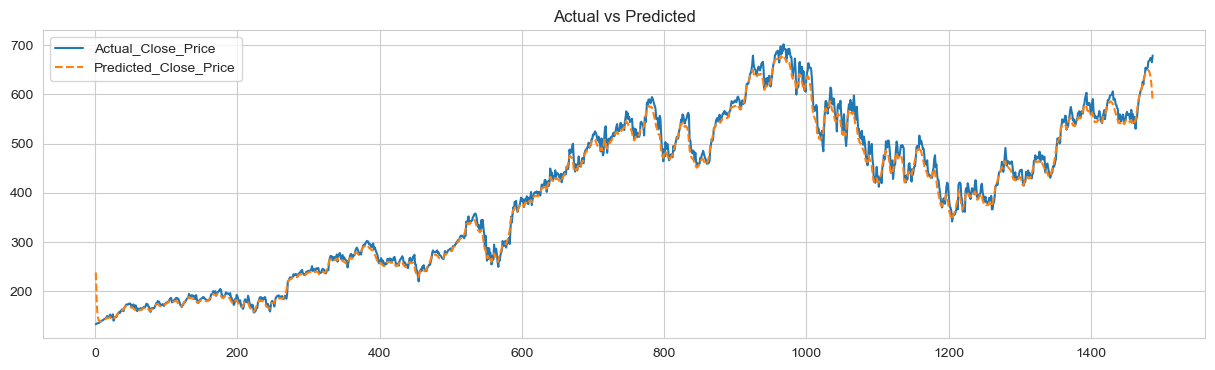

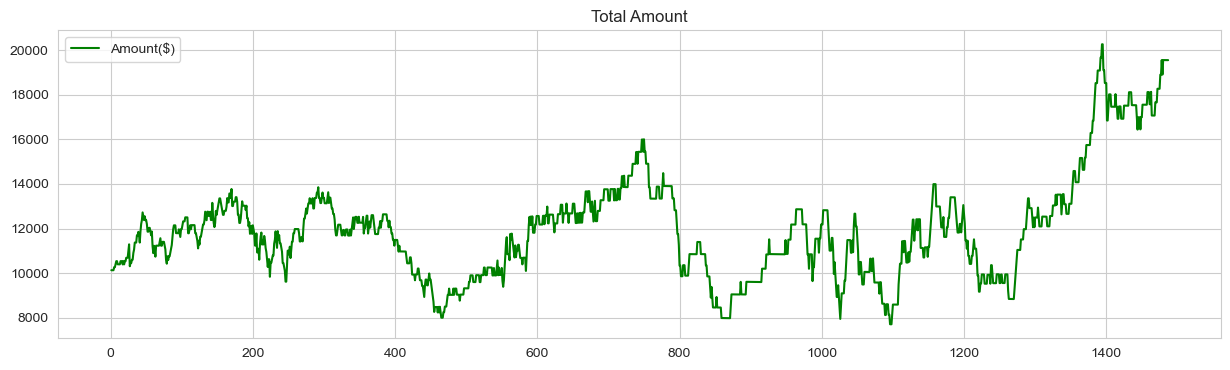

In [94]:
amount = 10000
signal = 0
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []

for i in range(len(results)-1):
    if results['Predicted'][i] > results['Actual'][i-1]:
        action.append('Buy at Open & Sell at Close')
        stocks = int(amount/results['Open'][i])
        balance = int(amount%results['Close'][i])
        portfolio = stocks * results ['Open'][i]
        print(i,'Buy at Open',round(portfolio,2),stocks,round(balance,2))
        
        
        # action.append('Sell at End')
        portfolio = stocks * results['Close'][i]
        signal = 0
        stocks = 0
        amount = balance + portfolio
        portfolio = 0
        balance = 0
        print(i,'Sell at Close',round(amount,2),balance)
        Amount.append(amount)
        Portfolio.append(round(portfolio,5))
        
    else:
        action.append('Sell at Open & Bull at Close')
        stocks = int(amount/results['Open'][i])
        balance = int(amount%results['Close'][i])
        portfolio = stocks * results ['Open'][i]
        print(i,'Sell at Open',round(portfolio,2),'-',stocks,round(balance,2))
        
        
        # action.append('Buy at Close')
        portfolio = stocks * results['Close'][i]
        signal = 0
        stocks = 0
        amount = balance + portfolio
        portfolio = 0
        balance = 0
        print(i,'Buy Back at Close',round(amount,2),balance)
        Amount.append(amount)
        Portfolio.append(round(portfolio,5))
    print('\n')
        

Strategy_Result = pd.DataFrame({'Actual_Close_Price':NOW.Close[1:],
                                 'Predicted_Close_Price':list(y_pred[1:]),
                                 'Date': NOW.Date[1:],
                                 'Action':  action,
                                 # 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.head()

Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-g'], 
                                            title = 'Total Amount')

In [95]:
Profit = (Amount[-1])/10000
print('Initial_Investment : 10000$')
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent:',Profit*100,'%')

Initial_Investment : 10000$
Final Amount: 19549.959716796875 $
Profit_Percent: 195.49959716796874 %


# 5.2 Buy & Hold Trading Strategy

In [96]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(results)-1):
    if results['Predicted'][i+1] > results['Actual'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / results['Actual'][i])
            balance = int(amount % results['Actual'][i])
            portfolio = stocks * results['Actual'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',results['Actual'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * results['Actual'][i]
            amount = portfolio + balance
            print('Stock:',results['Actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif results['Predicted'][i+1] < results['Actual'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * results['Actual'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',results['Actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',results['Actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    print('\n')

Stock: 131.72999572753906 Action: Buy Portfolio: 9879.75 Stocks: 75 Balance_init: 120 total($) 9999.75


Stock: 132.91000366210938 Action: Bought--Holding Portfolio: 9968.25 Stocks: 75 Balance_init: 120 total($) 10088.25


Stock: 133.85000610351562 Action: Bought--Holding Portfolio: 10038.75 Stocks: 75 Balance_init: 120 total($) 10158.75


Stock: 135.00999450683594 Action: Bought--Holding Portfolio: 10125.75 Stocks: 75 Balance_init: 120 total($) 10245.75


Stock: 135.3000030517578 Action: Bought--Holding Portfolio: 10147.5 Stocks: 75 Balance_init: 120 total($) 10267.5


Stock: 135.4499969482422 Action: Bought--Holding Portfolio: 10158.75 Stocks: 75 Balance_init: 120 total($) 10278.75


Stock: 136.22999572753906 Action: Bought--Holding Portfolio: 10217.25 Stocks: 75 Balance_init: 120 total($) 10337.25


Stock: 137.5800018310547 Action: Bought--Holding Portfolio: 10318.5 Stocks: 75 Balance_init: 120 total($) 10438.5


Stock: 138.19000244140625 Action: Bought--Holding Portfolio: 10364.25 

In [97]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price':NOW.Close[1:],
                                 'Predicted_Close_Price':list(y_pred[1:]),
                                 'Date': NOW.Date[1:],
                                 'Action':  action,
                                 #'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.tail()

Actual_Close_Price  Predicted_Close_Price       Date  \
1483          669.659973             642.620851 2023-11-22   
1484          673.900024             635.734699 2023-11-24   
1485          670.549988             623.690028 2023-11-27   
1486          665.239990             607.557103 2023-11-28   
1487          678.929993             586.325422 2023-11-29   

                              Action  Portfolio($)    Amount($)  
1483  Price-Prediction-Already-Lower           0.0  177472962.0  
1484  Price-Prediction-Already-Lower           0.0  177472962.0  
1485  Price-Prediction-Already-Lower           0.0  177472962.0  
1486  Price-Prediction-Already-Lower           0.0  177472962.0  
1487  Price-Prediction-Already-Lower           0.0  177472962.0

<AxesSubplot:title={'center':'Total Amount'}>

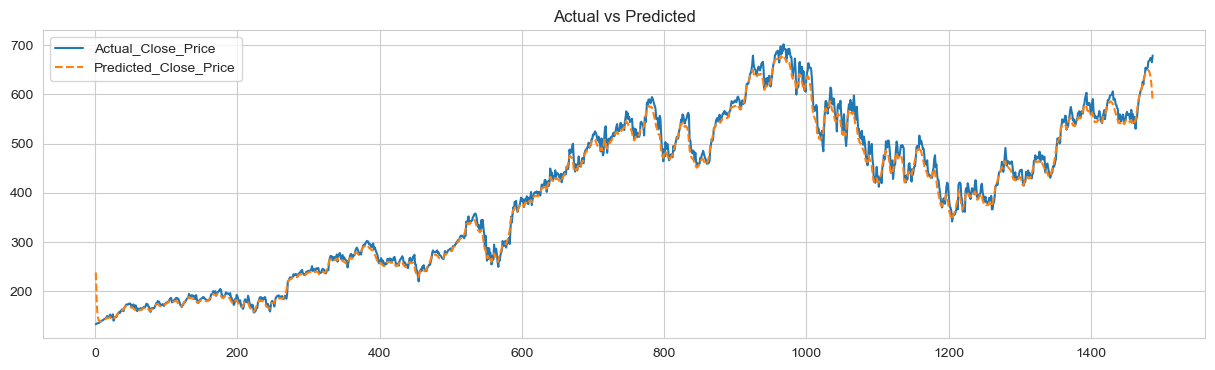

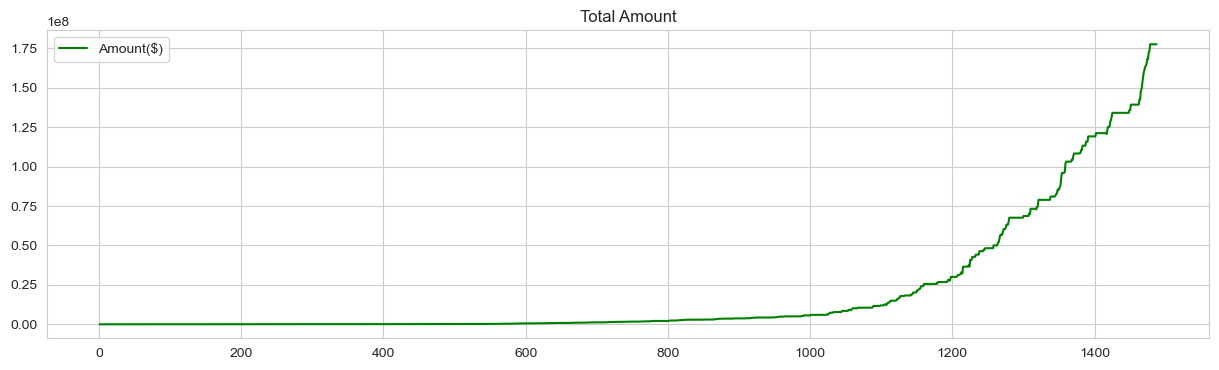

In [98]:
Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-g'], 
                                            title = 'Total Amount')

In [99]:
Profit = (Amount[-1] - Amount[-251])/Amount[-251]
print('Initial_Investment : ',Amount[-251])
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent latest trading year:',round(Profit*100,2),'%')

Initial_Investment :  44168030.0
Final Amount: 177472962.0 $
Profit_Percent latest trading year: 301.81 %


In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


R2_score  = r2_score(Strategy_Result['Actual_Close_Price'], Strategy_Result['Predicted_Close_Price'], multioutput='variance_weighted')

print("R2 Score : ",R2_score)


R2 Score :  0.9931637152776922


## 7. Moving Averages

In [101]:
import pandas_datareader.data as pdr
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [102]:
import yfinance as yf
yf.pdr_override()
# Define the start and end dates
start_date = datetime(2013,1,1)
end_date = datetime(2023,11,30)
 
NOW_df = pd.DataFrame()
# Get the stock data
NOW_df = pdr.get_data_yahoo('NOW', start_date, end_date)
NOW_df.head(5)

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2013-01-02  30.750000  30.750000  29.180000  30.200001  30.200001  1525500
2013-01-03  30.100000  30.400000  29.410000  29.690001  29.690001   863100
2013-01-04  29.799999  29.840000  28.959999  29.020000  29.020000  1034400
2013-01-07  28.540001  29.100000  27.020000  27.360001  27.360001  2517000
2013-01-08  27.360001  27.610001  25.610001  26.200001  26.200001  2826800

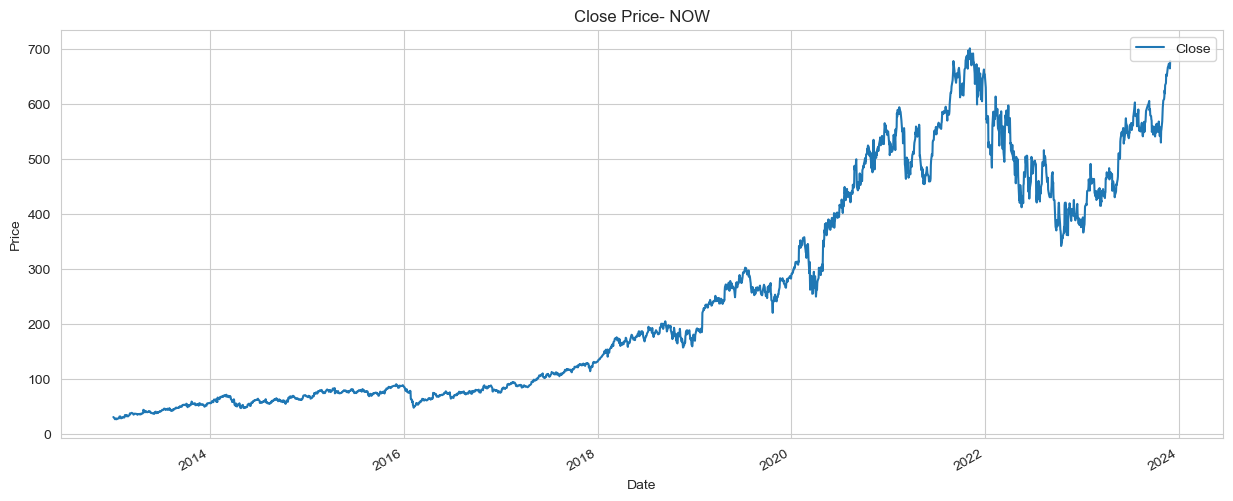

In [103]:

NOW_df[['Close']].plot(figsize=(15,6))

plt.title('Close Price- NOW')
plt.ylabel('Price')
plt.show()

In [104]:
# Display the fetched data
print(NOW_df.head())

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2013-01-02  30.750000  30.750000  29.180000  30.200001  30.200001  1525500
2013-01-03  30.100000  30.400000  29.410000  29.690001  29.690001   863100
2013-01-04  29.799999  29.840000  28.959999  29.020000  29.020000  1034400
2013-01-07  28.540001  29.100000  27.020000  27.360001  27.360001  2517000
2013-01-08  27.360001  27.610001  25.610001  26.200001  26.200001  2826800


In [105]:
# Calculate 20 days SMA and 50 days SMA
NOW_df['20_SMA'] = NOW_df['Close'].rolling(window=20, min_periods=1).mean()
NOW_df['50_SMA'] = NOW_df['Close'].rolling(window=50, min_periods=1).mean()
 
# Create a new DataFrame with only '20_SMA' and '50_SMA' columns
sma_data = NOW_df[['20_SMA', '50_SMA']]
 
# Display the new DataFrame
print(sma_data.head())

               20_SMA     50_SMA
Date                            
2013-01-02  30.200001  30.200001
2013-01-03  29.945001  29.945001
2013-01-04  29.636667  29.636667
2013-01-07  29.067501  29.067501
2013-01-08  28.494001  28.494001


In [106]:
NOW_df['Signal'] = 0.0
NOW_df['Signal'] = np.where(NOW_df['20_SMA'] > NOW_df['50_SMA'], 1.0, 0.0)

In [107]:
NOW_df['Position'] = NOW_df['Signal'].diff()
# display first few rows
NOW_df.head()

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2013-01-02  30.750000  30.750000  29.180000  30.200001  30.200001  1525500   
2013-01-03  30.100000  30.400000  29.410000  29.690001  29.690001   863100   
2013-01-04  29.799999  29.840000  28.959999  29.020000  29.020000  1034400   
2013-01-07  28.540001  29.100000  27.020000  27.360001  27.360001  2517000   
2013-01-08  27.360001  27.610001  25.610001  26.200001  26.200001  2826800   

               20_SMA     50_SMA  Signal  Position  
Date                                                
2013-01-02  30.200001  30.200001     0.0       NaN  
2013-01-03  29.945001  29.945001     0.0       0.0  
2013-01-04  29.636667  29.636667     0.0       0.0  
2013-01-07  29.067501  29.067501     0.0       0.0  
2013-01-08  28.494001  28.494001     0.0       0.0

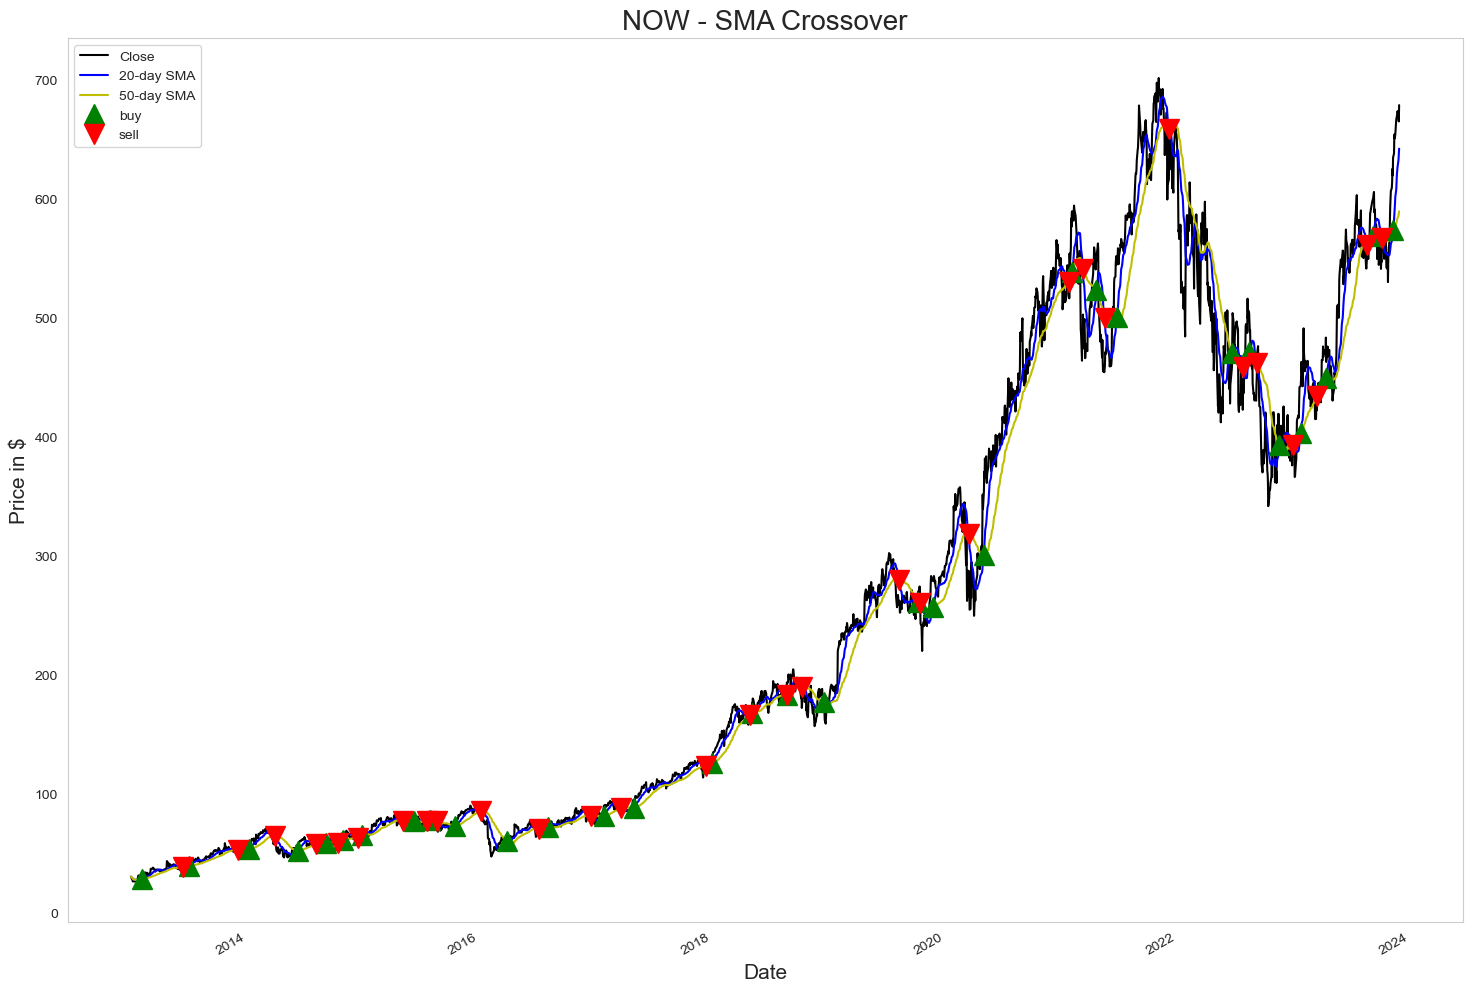

In [108]:
plt.figure(figsize = (18,13))
# plot close price, short-term and long-term moving averages 
NOW_df['Close'].plot(color = 'k', label= 'Close') 
NOW_df['20_SMA'].plot(color = 'b',label = '20-day SMA') 
NOW_df['50_SMA'].plot(color = 'y',label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(NOW_df[NOW_df['Position'] == 1].index, 
         NOW_df['20_SMA'][NOW_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(NOW_df[NOW_df['Position'] == -1].index, 
        NOW_df['20_SMA'][NOW_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in $', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('NOW - SMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [109]:

NOW_df['20_EMA'] = NOW_df['Close'].ewm(span = 20, adjust = False).mean()

# Create 50 days exponential moving average column
NOW_df['50_EMA'] = NOW_df['Close'].ewm(span = 50, adjust = False).mean()

In [110]:
# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0 
NOW_df['Signal'] = 0.0  
NOW_df['Signal'] = np.where(NOW_df['20_EMA'] > NOW_df['50_EMA'], 1.0, 0.0)

In [111]:

NOW_df['Position'] = NOW_df['Signal'].diff()

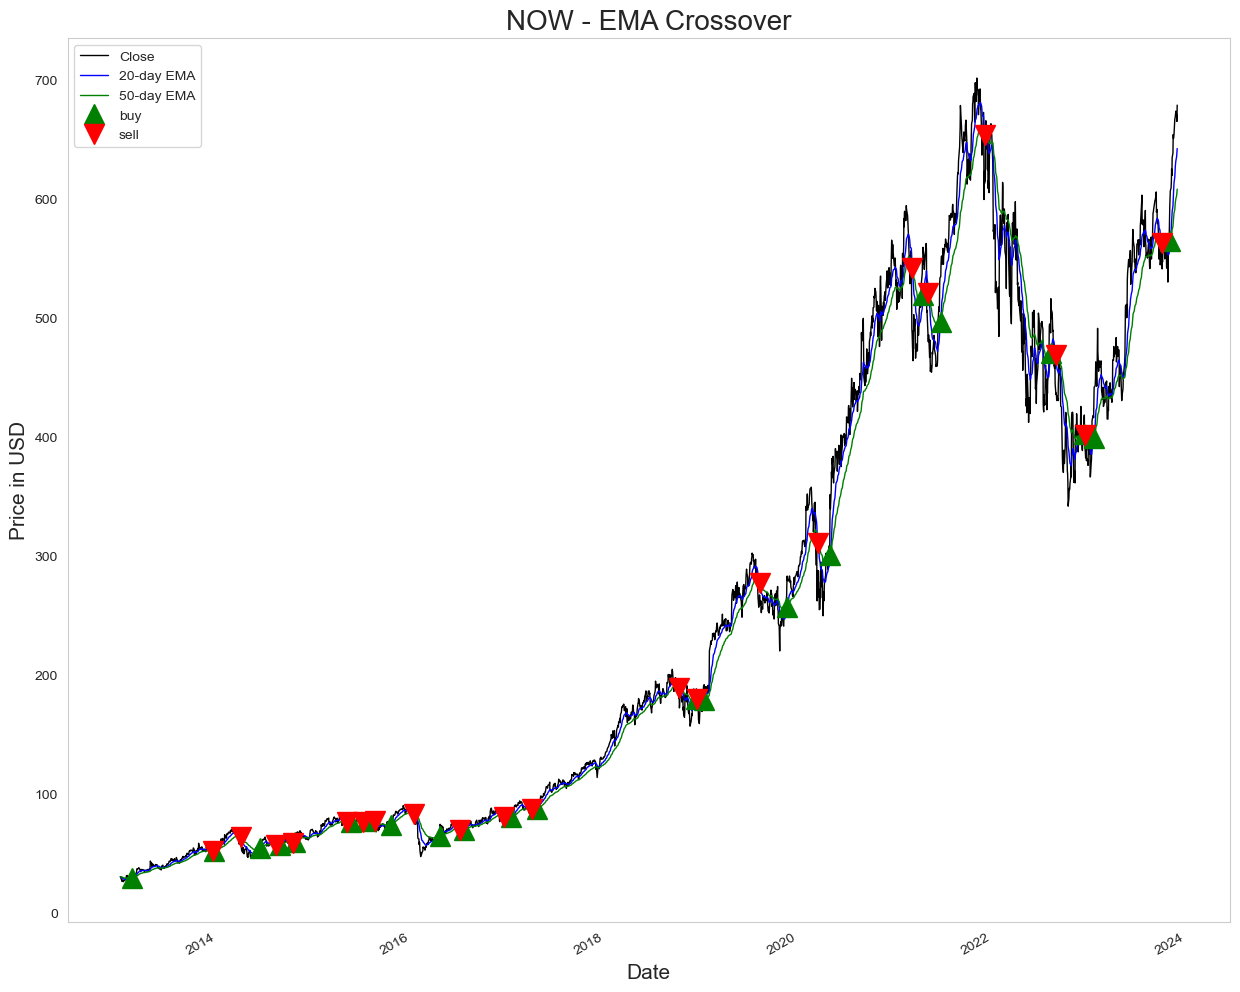

In [112]:
plt.figure(figsize = (15,13))
NOW_df['Close'].plot(color = 'k', lw = 1, label = 'Close')  
NOW_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
NOW_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')
plt.plot(NOW_df[NOW_df['Position'] == 1].index, 
         NOW_df['20_EMA'][NOW_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(NOW_df[NOW_df['Position'] == -1].index, 
         NOW_df['20_EMA'][NOW_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('NOW - EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()